In [3]:
import pandas as pd
from itertools import combinations
import math
import numpy as np
import statistics
from itertools import permutations
from bioinfokit import analys, visuz
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, randint
from matplotlib_venn import venn2
import copy
import random
from vst_function import *
from stattools.resampling import PermutationTest
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from pca_plot_function import *
from pyranges import PyRanges

<h1> GRCh37

In [2]:
anotation = pd.read_csv('../data/SGDP_anotation.csv', sep=',', encoding='latin-1',  index_col=1)
cnv = pd.read_csv('../data/input_grch37_cnv.csv', index_col=0)
cnv

,Chromosome,Start,End,LP6005441-DNA_A01,LP6005441-DNA_A03,LP6005441-DNA_A04,LP6005441-DNA_A05,LP6005441-DNA_A06,LP6005441-DNA_A08,LP6005441-DNA_A09,...,SS6004472,SS6004473,SS6004474,SS6004475,SS6004476,SS6004477,SS6004478,SS6004479,SS6004480,Length
0,1,176101.0,355800.0,4.0,2.0,2.0,3.0,3.0,2.333333,3.0,...,1.0,3.0,1.000000,2.666667,4.0,1.666667,2.0,3.0,3.0,179699.0
1,1,449901.0,564900.0,0.0,1.5,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,114999.0
2,1,665601.0,843800.0,3.0,4.0,2.0,2.0,2.0,2.000000,2.0,...,3.0,4.5,3.333333,3.666667,3.0,4.000000,4.5,2.0,2.0,178199.0
3,1,891701.0,900200.0,2.0,2.0,2.0,2.0,2.0,2.000000,2.0,...,0.0,2.0,2.000000,2.000000,0.0,2.000000,0.0,0.0,0.0,8499.0
4,1,1007801.0,1015200.0,0.0,2.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,2.000000,2.0,0.0,2.0,7399.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7775,9,140136301.0,140189600.0,2.0,2.0,2.0,2.0,2.0,2.000000,2.0,...,2.0,2.0,2.000000,2.000000,2.0,2.000000,2.0,2.0,2.0,53299.0
7776,9,140197201.0,140222900.0,2.0,2.0,2.0,2.0,2.0,2.000000,2.0,...,2.0,2.0,2.000000,2.000000,2.0,2.000000,2.0,2.0,2.0,25699.0
7777,9,140245301.0,140317100.0,0.0,1.0,0.0,0.0,1.0,2.000000,0.0,...,0.0,2.0,1.000000,1.000000,0.0,2.000000,2.0,0.0,0.0,71799.0
7778,9,140387601.0,140498800.0,2.0,2.0,2.0,2.0,2.0,2.000000,2.0,...,4.0,2.0,4.000000,2.000000,4.0,2.000000,4.0,2.0,2.0,111199.0


In [3]:
data_grch37 = cnv.iloc[:,3:279]
data_grch37 = data_grch37.T
data_grch37 = data_grch37.fillna(2)

features = anotation.loc[:,["7-Gender","10-Region", "11-Country",]]
data_grch37 = features.merge(data_grch37, left_index=True, right_index=True)
data_grch37.to_csv('../data/input_dapc_grch37.csv')
data_grch37

,7-Gender,10-Region,11-Country,0,1,2,3,4,5,6,...,7770,7771,7772,7773,7774,7775,7776,7777,7778,7779
LP6005443-DNA_B06,F,WestEurasia,Iceland,1.500000,0.0,2.0,2.0,0.0,2.0,2.0,...,2.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0
LP6005442-DNA_D08,F,WestEurasia,Iceland,3.333333,0.0,2.0,2.0,2.0,2.0,2.0,...,2.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0
LP6005441-DNA_D07,F,SouthAsia,Pakistan,2.000000,0.0,2.0,2.0,2.0,2.0,2.0,...,2.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0
LP6005441-DNA_C07,M,SouthAsia,Pakistan,3.000000,0.0,2.0,2.0,0.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0
LP6005442-DNA_G11,M,Africa,SierraLeone,3.333333,0.0,2.0,2.0,2.0,2.0,2.0,...,2.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LP6005441-DNA_H10,F,WestEurasia,Russia,2.000000,0.0,2.0,2.0,0.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0
LP6005519-DNA_A06,M,EastAsia,Myanmar,2.000000,0.0,2.0,2.0,1.0,2.0,2.0,...,2.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0
LP6005519-DNA_B06,M,EastAsia,Myanmar,2.000000,0.0,2.0,2.0,0.0,2.0,2.0,...,2.0,0.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0,2.0
LP6005441-DNA_B08,F,Africa,Congo,2.666667,0.0,2.0,2.0,0.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


<h2> PCA

In [135]:
data_grch37_deletions = data_grch37[(data_grch37[data_grch37.columns[1:]]<3).all(axis=1)]
counts = data_grch37_deletions.T
counts = counts.sort_index()
counts = counts.fillna(2)
counts = counts.sort_index()
counts

,28,29,38,43,66,169,170,171,202,228,...,7556,7603,7612,7645,7647,7653,7752,7753,7758,7765
LP6005441-DNA_A01,2.0,2.0,0.333333,2.0,2.0,2.0,2.0,2.0,0.0,2.0,...,2.0,0.0,0.0,0.571429,1.205128,0.0,2.0,1.0,0.0,1.0
LP6005441-DNA_A03,2.0,2.0,0.250000,0.0,0.0,2.0,2.0,1.0,0.0,1.0,...,0.0,0.0,2.0,1.500000,0.900000,0.0,2.0,2.0,2.0,2.0
LP6005441-DNA_A04,2.0,2.0,0.666667,0.0,2.0,0.0,0.0,2.0,0.0,1.0,...,2.0,0.0,0.0,0.000000,0.825000,0.0,2.0,1.0,0.0,2.0
LP6005441-DNA_A05,2.0,2.0,0.666667,0.0,0.0,2.0,2.0,2.0,0.0,2.0,...,0.0,2.0,0.0,0.000000,1.086957,0.0,2.0,1.0,1.0,0.0
LP6005441-DNA_A06,2.0,2.0,0.666667,2.0,2.0,2.0,2.0,2.0,0.0,1.0,...,2.0,0.0,2.0,0.800000,1.052632,1.0,1.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SS6004476,0.0,2.0,0.666667,0.0,2.0,1.0,2.0,2.0,0.0,0.0,...,2.0,0.0,2.0,0.000000,0.593750,0.0,2.0,0.0,0.0,2.0
SS6004477,2.0,2.0,0.333333,0.0,2.0,2.0,2.0,0.0,0.0,2.0,...,2.0,0.0,1.0,1.500000,0.750000,0.0,2.0,2.0,2.0,2.0
SS6004478,2.0,2.0,0.500000,0.0,0.0,2.0,2.0,2.0,0.0,2.0,...,2.0,0.0,2.0,1.714286,1.333333,0.0,2.0,2.0,0.0,2.0
SS6004479,0.0,2.0,0.666667,2.0,2.0,1.0,2.0,2.0,0.0,1.0,...,2.0,0.0,2.0,0.000000,1.454545,0.0,1.0,1.0,2.0,0.0


In [136]:
features = anotation.merge(counts, left_index=True, right_index=True)
features = features.loc[:,["7-Gender","10-Region", "11-Country",]]
features = features.sort_index()

            7-Gender        11-Country  component_1  component_2  component_3  \
10-Region                                                                       
WestEurasia        M  Russia(Caucasus)    -0.840375     4.154581    -0.832449   
Oceania            F    PapuaNewGuinea    -0.698541    -4.610423    -3.359343   
America            F          Colombia    -4.135006    -0.352524     4.897785   
WestEurasia        M            France    -0.099911     3.742974    -0.837697   
WestEurasia        M    Italy(Bergamo)     0.285660     3.267409    -1.567228   
...              ...               ...          ...          ...          ...   
America            M            Brazil    -3.500892     0.042367     4.623042   
Oceania            M         Australia     1.077744    -6.517427    -5.761394   
Oceania            U         Australia    -0.914004    -5.700619    -4.428701   
America            F            Mexico    -3.987563    -0.426533     4.702470   
Africa             M        

/Users/luciabazan/Documents/GitHub/cnv_sgdp/scripts/pca_plot_function.py:241: FutureWarning: Creating a Groupby object with a length-1 list-like level parameter will yield indexes as tuples in a future version. To keep indexes as scalars, create Groupby objects with a scalar level parameter instead.
  for name, group in groups:
/Users/luciabazan/Documents/GitHub/cnv_sgdp/scripts/pca_plot_function.py:258: FutureWarning: Creating a Groupby object with a length-1 list-like level parameter will yield indexes as tuples in a future version. To keep indexes as scalars, create Groupby objects with a scalar level parameter instead.
  for name, group in groups:


NameError: name 'statistics' is not defined

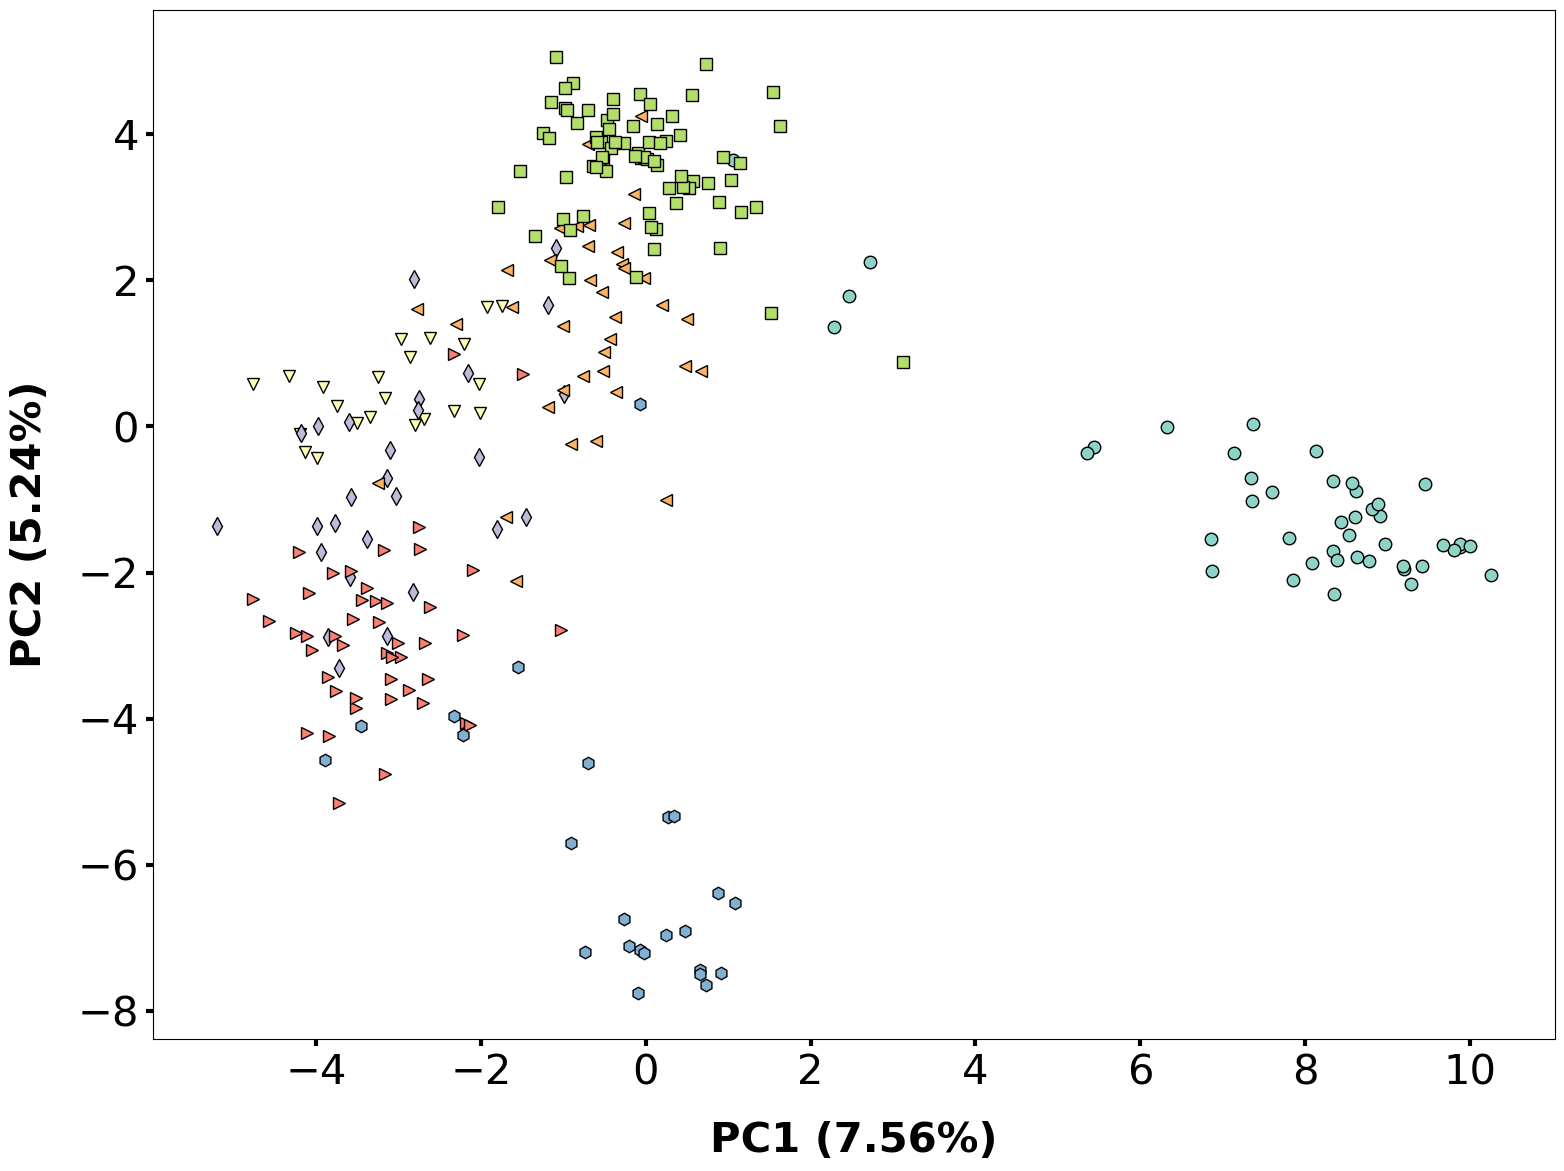

In [138]:
pca = PCA(n_components=10)
pca_results = pca.fit_transform(counts)

df_pca= pd.DataFrame(pca_results,
                          columns=['component_1','component_2', 'component_3', 'component_4',
                                  'component_5',
                                  'component_6',
                                  'component_7',
                                  'component_8',
                                  'component_9',
                                   'component_10'
                                  ],
                          index=features.index)




df_pca = features.merge(df_pca, left_index=True, right_index=True)

components = [1,2,3,4,5,6,7,8,9,10]

combinations_components = list(combinations(components,2))
#for i in combinations_components:
#    plot_scatter_cluster(data=df_pca, abscissa='component_'+str(i[0]), ordinate='component_'+str(i[1]), label_horizontal='PC '+ str(i[0]), label_vertical='PC '+str(i[1]), factor='10-Region', fonts=define_font_properties(), colors=define_color_properties(), legend=True)
    #print(str(i[0]))

plot_scatter_cluster_shape(data=df_pca, abscissa='component_1', ordinate='component_2', label_horizontal='PC1 (7.56%)', label_vertical='PC2 (5.24%)', factor='10-Region', fonts=define_font_properties(), colors=define_color_properties(), legend=True)
plt.title("GRCh37 PCA deletions", size=30, fontweight="bold")

plt.savefig('../plots/grch37_pca_deletions_pc12.png', transparent=True)

In [139]:
#Duplications
data_grch37_duplications = data_grch37[(data_grch37[data_grch37.columns[1:]]>1).all(axis=1)]
counts = data_grch37_duplications.T
counts = counts.sort_index()
counts = counts.fillna(2)
counts = counts.sort_index()

            7-Gender        11-Country  component_1  component_2  component_3  \
10-Region                                                                       
WestEurasia        M  Russia(Caucasus)     0.989471    -0.391314    -2.678558   
Oceania            F    PapuaNewGuinea    -0.486498     1.552977    -2.312684   
America            F          Colombia    -4.385794     1.268087     1.193442   
WestEurasia        M            France    -1.777458    -1.651917     2.134501   
WestEurasia        M    Italy(Bergamo)     1.104429    -1.191189    -0.678227   
...              ...               ...          ...          ...          ...   
America            M            Brazil    -4.730586     0.626283    -0.528080   
Oceania            M         Australia     2.478386     2.849058     0.608054   
Oceania            U         Australia    -0.307732     0.708789    -0.290443   
America            F            Mexico    -1.323940     0.803729    -1.711157   
Africa             M        

/Users/luciabazan/Documents/GitHub/cnv_sgdp/scripts/pca_plot_function.py:241: FutureWarning: Creating a Groupby object with a length-1 list-like level parameter will yield indexes as tuples in a future version. To keep indexes as scalars, create Groupby objects with a scalar level parameter instead.
  for name, group in groups:
/Users/luciabazan/Documents/GitHub/cnv_sgdp/scripts/pca_plot_function.py:258: FutureWarning: Creating a Groupby object with a length-1 list-like level parameter will yield indexes as tuples in a future version. To keep indexes as scalars, create Groupby objects with a scalar level parameter instead.
  for name, group in groups:


NameError: name 'statistics' is not defined

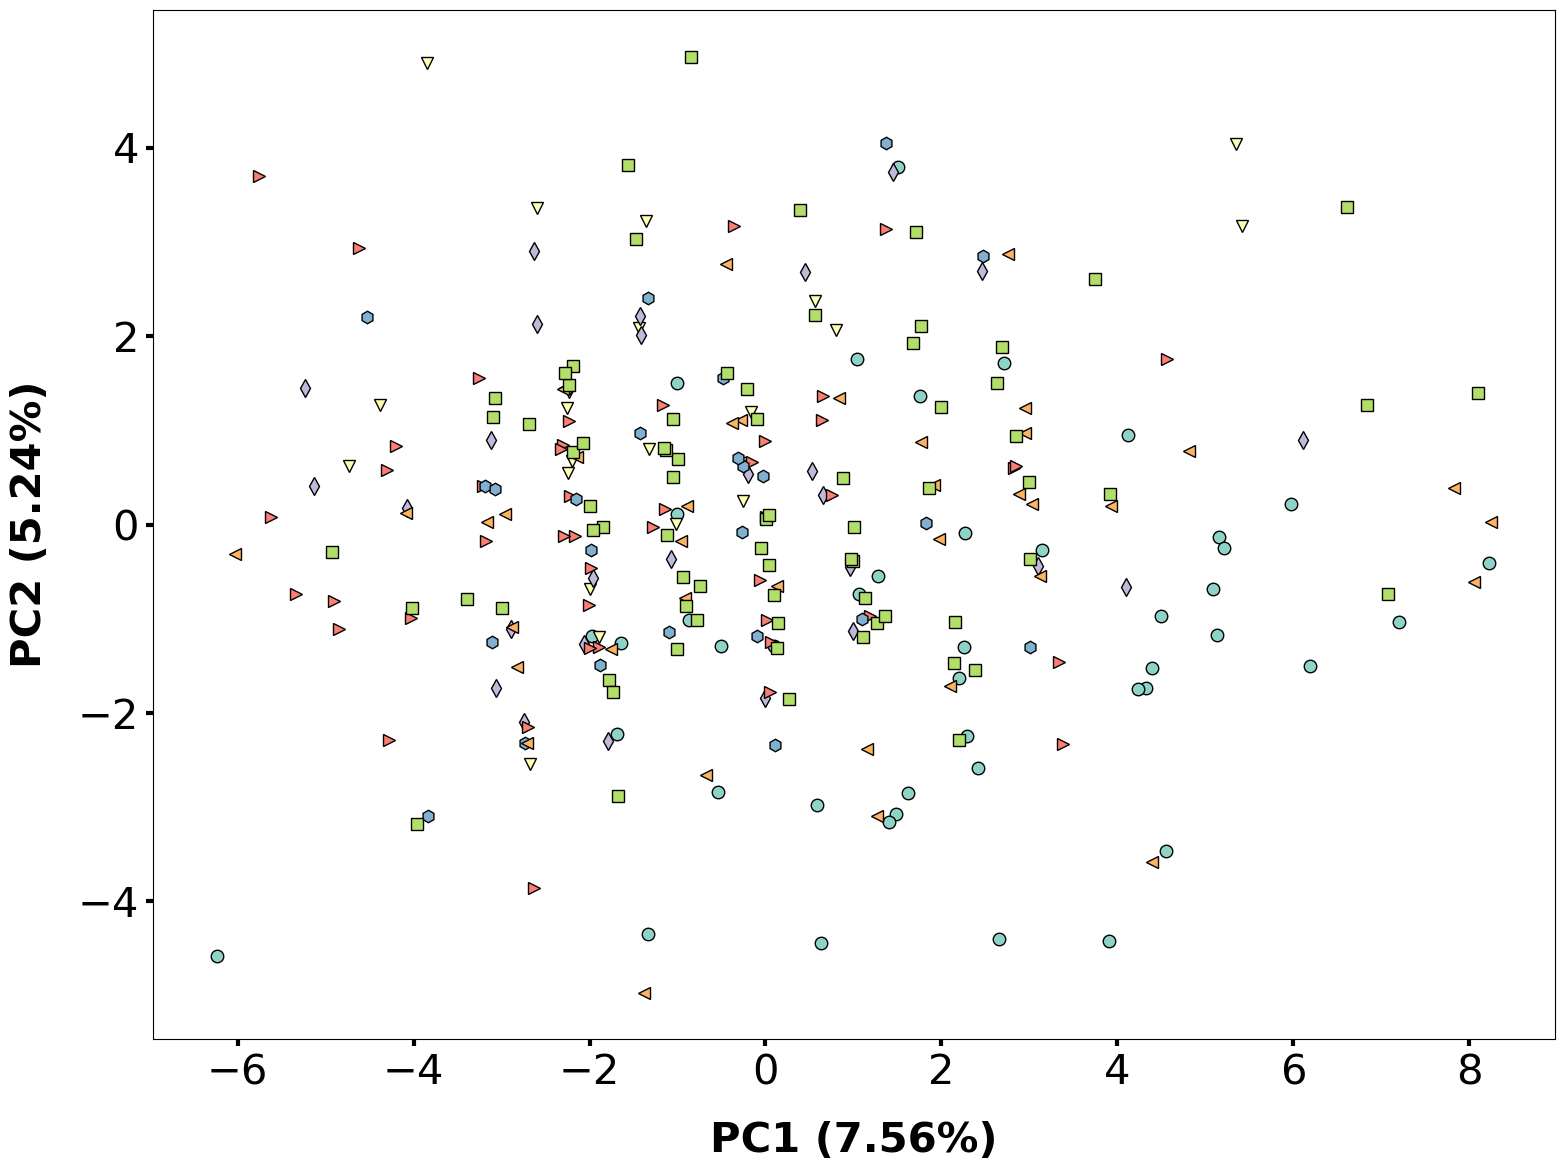

In [140]:
pca = PCA(n_components=10)
pca_results = pca.fit_transform(counts)

df_pca= pd.DataFrame(pca_results,
                          columns=['component_1','component_2', 'component_3', 'component_4',
                                  'component_5',
                                  'component_6',
                                  'component_7',
                                  'component_8',
                                  'component_9',
                                   'component_10'
                                  ],
                          index=features.index)




df_pca = features.merge(df_pca, left_index=True, right_index=True)

components = [1,2,3,4,5,6,7,8,9,10]

combinations_components = list(combinations(components,2))
#for i in combinations_components:
#    plot_scatter_cluster(data=df_pca, abscissa='component_'+str(i[0]), ordinate='component_'+str(i[1]), label_horizontal='PC '+ str(i[0]), label_vertical='PC '+str(i[1]), factor='10-Region', fonts=define_font_properties(), colors=define_color_properties(), legend=True)
    #print(str(i[0]))

plot_scatter_cluster_shape(data=df_pca, abscissa='component_1', ordinate='component_2', label_horizontal='PC1 (7.56%)', label_vertical='PC2 (5.24%)', factor='10-Region', fonts=define_font_properties(), colors=define_color_properties(), legend=True)
plt.title("GRCh37 PCA duplications", size=30, fontweight="bold")

plt.savefig('../plots/grch37_pca_duplications_pc12.png', transparent=True)

<h2> Vst 

In [397]:
####### Groupby regions #######
dt_group = data_grch37.groupby('10-Region')

dt_groupped = []
regions = anotation['10-Region'].unique()
regions.sort()
for i in regions:
    dt_groupped.append(dt_group.get_group(str(i)))
    

#### Names to pair-population
regions = data_grch37['10-Region'].unique()
regions.sort()
combination_names = []
for i in list(combinations(regions,2)):
    combination_names.append(i[0]+str('-')+i[1])
    

for j in dt_groupped:
    j.drop(columns=['10-Region', '11-Country', '7-Gender'], inplace=True)

/var/folders/05/4pfxtbrs5459ytz3j1jhcgt00000gn/T/ipykernel_30613/1424340435.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  j.drop(columns=['10-Region', '11-Country', '7-Gender'], inplace=True)
/var/folders/05/4pfxtbrs5459ytz3j1jhcgt00000gn/T/ipykernel_30613/1424340435.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  j.drop(columns=['10-Region', '11-Country', '7-Gender'], inplace=True)
/var/folders/05/4pfxtbrs5459ytz3j1jhcgt00000gn/T/ipykernel_30613/1424340435.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.

In [398]:
## VST for pair-population
vst_dt = []

combination_regions = list(combinations([0,1,2,3,4,5,6],2))
for region in combination_regions:
        statistic = vst_function((dt_groupped[region[0]]), (dt_groupped[region[1]]))
        vst_dt.append(statistic)

vst_dt = pd.DataFrame(vst_dt).set_axis(combination_names)

In [399]:
filtering_vst = pd.DataFrame(vst_dt)>=0.2
filtering_vst = filtering_vst.loc[:, filtering_vst.any()]
#filtering_vst = filtering_vst.set_axis(combination_names)

In [400]:
## Coordinates anotation 
vst_dt = vst_dt.T
vst_dt.insert (0, 'Chromosome', cnv['Chromosome'])
vst_dt.insert (1, 'Start', cnv['Start'])
vst_dt.insert (2, 'End', cnv['End'])
#vst_dt.insert (3, 'Type', cnv['Type'])
vst_dt = vst_dt.round(5)
vst_dt_grch37 = vst_dt.replace(np.NaN, 0)
#vst_dt.to_csv('../data/vst_results_grch37.csv', index=False)
vst_dt_grch37['Chromosome'] = 'chr' + vst_dt_grch37['Chromosome'].astype(str)
vst_dt_grch37['Start'] = vst_dt_grch37['Start'].astype(int)
vst_dt_grch37['End'] = vst_dt_grch37['End'].astype(int)
vst_dt_grch37

,Chromosome,Start,End,Africa-America,Africa-CentralAsiaSiberia,Africa-EastAsia,Africa-Oceania,Africa-SouthAsia,Africa-WestEurasia,America-CentralAsiaSiberia,...,CentralAsiaSiberia-EastAsia,CentralAsiaSiberia-Oceania,CentralAsiaSiberia-SouthAsia,CentralAsiaSiberia-WestEurasia,EastAsia-Oceania,EastAsia-SouthAsia,EastAsia-WestEurasia,Oceania-SouthAsia,Oceania-WestEurasia,SouthAsia-WestEurasia
0,chr1,176101,355800,0.00463,0.01545,0.00437,0.06854,0.00300,0.00382,0.00117,...,0.03004,0.12901,0.03077,0.02163,0.03719,0.00019,0.00001,0.04619,0.02851,0.00021
1,chr1,449901,564900,0.00000,0.02328,0.01075,0.02736,0.02676,0.00508,0.01698,...,0.00481,0.00028,0.00023,0.01477,0.00322,0.00394,0.00323,0.00001,0.01365,0.01578
2,chr1,665601,843800,0.01474,0.02858,0.00966,0.04087,0.01054,0.00375,0.00303,...,0.00572,0.15658,0.01947,0.02476,0.09015,0.00012,0.00347,0.11642,0.08635,0.00345
3,chr1,891701,900200,0.00164,0.00496,0.00088,0.00077,0.03324,0.00406,0.01519,...,0.00197,0.01172,0.04514,0.00009,0.00335,0.02864,0.00120,0.05328,0.00782,0.01734
4,chr1,1007801,1015200,0.02565,0.00042,0.00528,0.00714,0.01642,0.00555,0.02757,...,0.00815,0.01245,0.02210,0.00737,0.00016,0.00272,0.00002,0.00147,0.00005,0.00202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7775,chr9,140136301,140189600,0.00769,0.00176,0.02968,0.00287,0.04227,0.01781,0.01698,...,0.01586,0.00014,0.02636,0.00943,0.01292,0.00372,0.00026,0.02274,0.00773,0.00126
7776,chr9,140197201,140222900,0.00769,0.00877,0.01175,0.00814,0.01081,0.01437,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
7777,chr9,140245301,140317100,0.24272,0.20920,0.43720,0.24604,0.35019,0.19225,0.00332,...,0.06365,0.00252,0.02572,0.00111,0.04577,0.00789,0.06954,0.01352,0.00562,0.03349
7778,chr9,140387601,140498800,0.01742,0.01311,0.02784,0.05795,0.01615,0.03466,0.00503,...,0.00815,0.04592,0.00000,0.01032,0.02084,0.01009,0.00131,0.05328,0.01100,0.01328


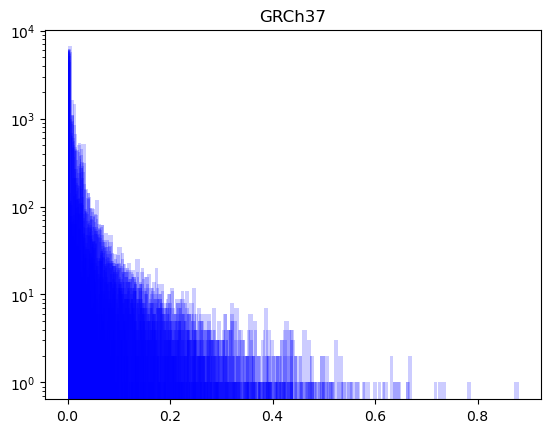

In [401]:
#sns.set_palette("bright")
for i in vst_dt_grch37.iloc[:,4:27].columns:
    plt.hist(vst_dt_grch37[i], bins=100, alpha=0.2, log=True, color="blue")
    plt.title('GRCh37')
    plt.savefig('../plots/grch37_vst_values_distribution.png', transparent=True)

In [402]:
vst_dt_filtering_location = vst_dt_grch37.iloc[filtering_vst.columns]
vst_dt_filtering_location#[vst_dt_filtering_location['chr'] == '8'].sort_values(by='WestEurasia-Oceania', ascending=False).head(50)

,Chromosome,Start,End,Africa-America,Africa-CentralAsiaSiberia,Africa-EastAsia,Africa-Oceania,Africa-SouthAsia,Africa-WestEurasia,America-CentralAsiaSiberia,...,CentralAsiaSiberia-EastAsia,CentralAsiaSiberia-Oceania,CentralAsiaSiberia-SouthAsia,CentralAsiaSiberia-WestEurasia,EastAsia-Oceania,EastAsia-SouthAsia,EastAsia-WestEurasia,Oceania-SouthAsia,Oceania-WestEurasia,SouthAsia-WestEurasia
28,chr1,8360201,8364200,0.32161,0.19993,0.00000,0.00000,0.00000,0.00000,0.00956,...,0.20261,0.15949,0.19242,0.22806,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
29,chr1,9846201,9856800,0.27586,0.04239,0.04981,0.02736,0.09376,0.01025,0.12424,...,0.00196,0.01078,0.02217,0.00515,0.01737,0.01359,0.01518,0.04846,0.00032,0.05309
38,chr1,13219701,13781900,0.12209,0.03194,0.00035,0.01716,0.00461,0.03030,0.25941,...,0.03815,0.09418,0.06579,0.10016,0.01286,0.00234,0.02476,0.00593,0.00112,0.01313
43,chr1,16150401,16158200,0.00136,0.01265,0.02431,0.16701,0.07339,0.05665,0.02660,...,0.00097,0.28660,0.13966,0.09830,0.33966,0.18954,0.14828,0.02655,0.02751,0.00067
66,chr1,24377601,24592800,0.00769,0.11063,0.25742,0.66625,0.13524,0.14643,0.10092,...,0.06285,0.38182,0.00497,0.01769,0.14607,0.03831,0.01362,0.30917,0.20424,0.00607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7758,chr9,131183401,131451000,0.08988,0.07894,0.00025,0.00037,0.11241,0.33943,0.00243,...,0.07787,0.07081,0.00267,0.11866,0.00107,0.11122,0.32421,0.09506,0.30599,0.08592
7762,chr9,134074401,135035600,0.24892,0.00807,0.00186,0.06963,0.01037,0.02556,0.17743,...,0.00206,0.03050,0.02831,0.05141,0.04679,0.01793,0.03812,0.09668,0.14265,0.00107
7765,chr9,136453701,136980500,0.26558,0.21090,0.25679,0.01753,0.19511,0.06488,0.00612,...,0.00577,0.10340,0.00031,0.03457,0.13056,0.00897,0.07313,0.08675,0.01200,0.03287
7766,chr9,137097701,138417800,0.00357,0.09135,0.09335,0.42325,0.21517,0.18482,0.05796,...,0.00000,0.20208,0.03162,0.02063,0.19304,0.03398,0.02573,0.08993,0.08387,0.00047


In [404]:
vst_dt_filtered = vst_dt_grch37.iloc[filtering_vst.T.index]
vst_dt_filtered.to_csv('../data/vst_candidates_grch37.csv', index=False) 
vst_grch37 = vst_dt_filtered
vst_grch37

,Chromosome,Start,End,Africa-America,Africa-CentralAsiaSiberia,Africa-EastAsia,Africa-Oceania,Africa-SouthAsia,Africa-WestEurasia,America-CentralAsiaSiberia,...,CentralAsiaSiberia-EastAsia,CentralAsiaSiberia-Oceania,CentralAsiaSiberia-SouthAsia,CentralAsiaSiberia-WestEurasia,EastAsia-Oceania,EastAsia-SouthAsia,EastAsia-WestEurasia,Oceania-SouthAsia,Oceania-WestEurasia,SouthAsia-WestEurasia
28,chr1,8360201,8364200,0.32161,0.19993,0.00000,0.00000,0.00000,0.00000,0.00956,...,0.20261,0.15949,0.19242,0.22806,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
29,chr1,9846201,9856800,0.27586,0.04239,0.04981,0.02736,0.09376,0.01025,0.12424,...,0.00196,0.01078,0.02217,0.00515,0.01737,0.01359,0.01518,0.04846,0.00032,0.05309
38,chr1,13219701,13781900,0.12209,0.03194,0.00035,0.01716,0.00461,0.03030,0.25941,...,0.03815,0.09418,0.06579,0.10016,0.01286,0.00234,0.02476,0.00593,0.00112,0.01313
43,chr1,16150401,16158200,0.00136,0.01265,0.02431,0.16701,0.07339,0.05665,0.02660,...,0.00097,0.28660,0.13966,0.09830,0.33966,0.18954,0.14828,0.02655,0.02751,0.00067
66,chr1,24377601,24592800,0.00769,0.11063,0.25742,0.66625,0.13524,0.14643,0.10092,...,0.06285,0.38182,0.00497,0.01769,0.14607,0.03831,0.01362,0.30917,0.20424,0.00607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7758,chr9,131183401,131451000,0.08988,0.07894,0.00025,0.00037,0.11241,0.33943,0.00243,...,0.07787,0.07081,0.00267,0.11866,0.00107,0.11122,0.32421,0.09506,0.30599,0.08592
7762,chr9,134074401,135035600,0.24892,0.00807,0.00186,0.06963,0.01037,0.02556,0.17743,...,0.00206,0.03050,0.02831,0.05141,0.04679,0.01793,0.03812,0.09668,0.14265,0.00107
7765,chr9,136453701,136980500,0.26558,0.21090,0.25679,0.01753,0.19511,0.06488,0.00612,...,0.00577,0.10340,0.00031,0.03457,0.13056,0.00897,0.07313,0.08675,0.01200,0.03287
7766,chr9,137097701,138417800,0.00357,0.09135,0.09335,0.42325,0.21517,0.18482,0.05796,...,0.00000,0.20208,0.03162,0.02063,0.19304,0.03398,0.02573,0.08993,0.08387,0.00047


In [405]:
vst_dt_sb = vst_dt_filtered.drop(columns=['Chromosome', 'Start','End'])
data_grch37.drop(columns=['7-Gender', '10-Region', '11-Country'], inplace=True)
data_grch37 = data_grch37.T.iloc[vst_dt_filtered.index]

In [6]:
d = ids_hg19.set_index('Sample').merge(data_chm13.T, left_index=True, right_index=True)
d.to_csv('../data/input_dapc_t2tchm13.csv')

<h1> T2T-CHM13

In [4]:
chm13 = pd.read_csv('../data/input_t2t_cnv.csv')
#change to df when using telomeres and centromeres filtration
data_chm13 = chm13.pivot_table(index=["Chromosome", "Start", "End"], columns='Sample',  values='CNV_Value', fill_value=2).reset_index()
data_chm13 = data_chm13[(data_chm13[data_chm13.columns[4:]]<5).all(axis=1)]

anotation = pd.read_csv('../data/SGDP_anotation.csv', sep=',', encoding='latin-1')

ids_hg19 = pd.DataFrame()
ids_hg19['Sample'] = anotation['3-Illumina_ID']
ids_hg19['Region'] = anotation['10-Region']

features = ids_hg19.set_index('Sample').merge(data_chm13.T, left_index=True, right_index=True)
features.to_csv('../data/input_dapc_t2tchm13.csv')
features = features.loc[:,['Region']]
features = features.sort_index()

<h2>PCA 

             component_1  component_2
Region                               
WestEurasia     6.179930    -0.366739
Oceania         4.095508   -10.940676
America         6.216847    -8.778329
WestEurasia     6.070522     4.468509
WestEurasia     8.941619     6.109051
...                  ...          ...
WestEurasia   -15.657419     5.275091
Africa          0.604767     5.794852
Oceania        -3.012694    -9.531411
Oceania        -1.479514   -16.260092
Africa          3.255888    11.915298

[266 rows x 2 columns]
Count of groups by factor: 7


/Users/luciabazan/Documents/GitHub/cnv_sgdp/scripts/pca_plot_function.py:241: FutureWarning: Creating a Groupby object with a length-1 list-like level parameter will yield indexes as tuples in a future version. To keep indexes as scalars, create Groupby objects with a scalar level parameter instead.
  for name, group in groups:
/Users/luciabazan/Documents/GitHub/cnv_sgdp/scripts/pca_plot_function.py:258: FutureWarning: Creating a Groupby object with a length-1 list-like level parameter will yield indexes as tuples in a future version. To keep indexes as scalars, create Groupby objects with a scalar level parameter instead.
  for name, group in groups:


NameError: name 'statistics' is not defined

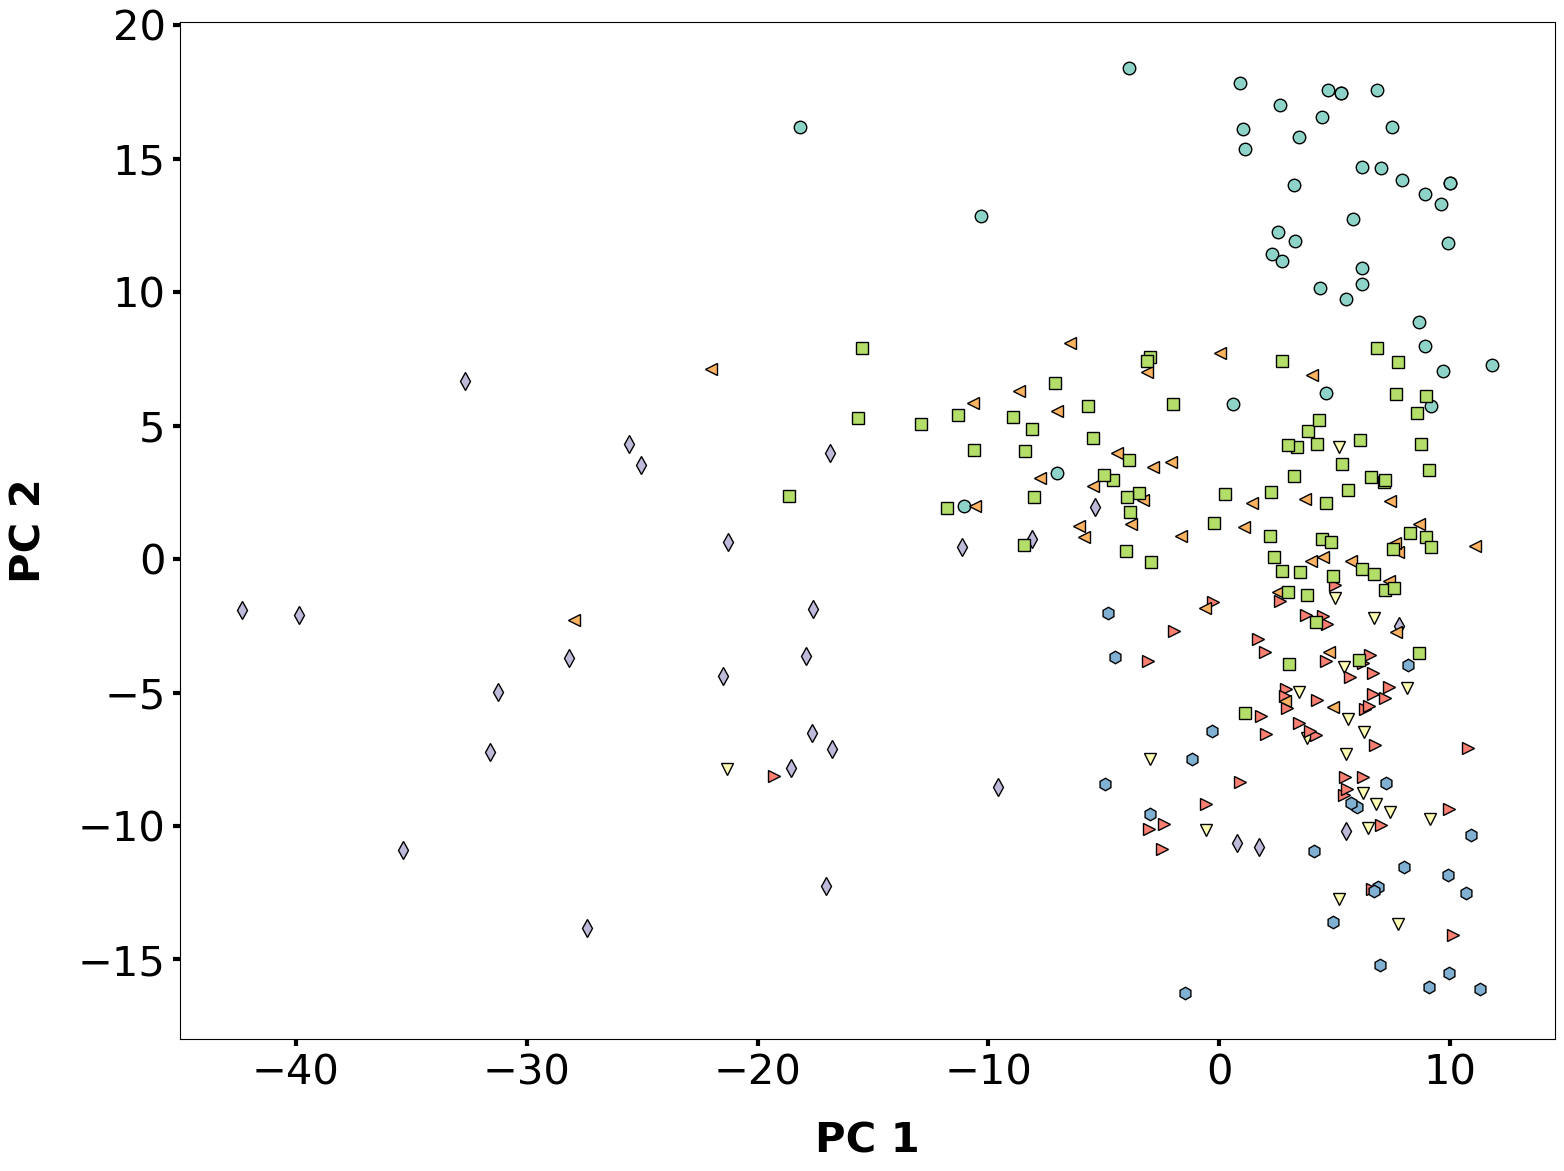

In [112]:
final = data_chm13.iloc[:,3:269]
deletions = final[(final[final.columns[1:]]<3).all(axis=1)]
#deletions = deletions[(deletions[deletions.columns[1:]]>1).all(axis=1)]
counts = deletions
counts = counts.fillna(2)
counts = counts.T
counts = counts.sort_index()
features = ids_hg19.set_index('Sample').merge(counts, left_index=True, right_index=True)
features = features.loc[:,['Region']]
features = features.sort_index()

x = StandardScaler().fit_transform(counts)
pca = PCA(n_components=2)
pca_results = pca.fit_transform(x)

df_pca= pd.DataFrame(pca_results,
                          columns=['component_1','component_2'],
                          index=features.index)


df_pca = features.merge(df_pca, left_index=True, right_index=True)

components = [1,2]

combinations_components = list(combinations(components,2))
for i in combinations_components:
    plot_scatter_cluster_shape(data=df_pca, abscissa='component_'+str(i[0]), ordinate='component_'+str(i[1]), label_horizontal='PC '+ str(i[0]), label_vertical='PC '+str(i[1]), factor='Region', fonts=define_font_properties(), colors=define_color_properties(), legend=True)


<h2> Vst 

In [353]:
features = ids_hg19.set_index('Sample').merge(counts, left_index=True, right_index=True)
features = features.loc[:,['Region']]
features = features.sort_index()
features 

,Region
LP6005441-DNA_A01,WestEurasia
LP6005441-DNA_A03,Oceania
LP6005441-DNA_A04,America
LP6005441-DNA_A05,WestEurasia
LP6005441-DNA_A06,WestEurasia
...,...
SS6004476,America
SS6004477,Oceania
SS6004478,Oceania
SS6004479,America


In [354]:
#coordinates = input_vst.iloc[:,0:2]
cnvs = data_chm13.iloc[:,3:269]
cnvs = cnvs.T
cnvs = cnvs.fillna(2)
dt = features.merge(cnvs, left_index=True, right_index=True)
dt

,Region,122,123,124,125,126,127,128,129,130,...,820135,820136,820137,820138,820139,820140,820141,820142,820143,820144
LP6005441-DNA_A01,WestEurasia,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
LP6005441-DNA_A03,Oceania,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
LP6005441-DNA_A04,America,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
LP6005441-DNA_A05,WestEurasia,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
LP6005441-DNA_A06,WestEurasia,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LP6007069-DNA_A01,WestEurasia,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
SS6004471,Africa,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0
SS6004477,Oceania,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
SS6004478,Oceania,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [355]:
####### Groupby regions #######
dt_group = dt.groupby('Region')

dt_groupped = []
regions = features['Region'].unique()
regions.sort()
for i in regions:
    dt_groupped.append(dt_group.get_group(str(i)))
    
#### Names to pair-population
regions = dt['Region'].unique()
regions.sort()
combination_names = []
for i in list(combinations(regions,2)):
    combination_names.append(i[0]+str('-')+i[1])

for j in dt_groupped:
    del j['Region']

In [356]:
## VST for pair-population
vst_dt = []

combination_regions = list(combinations([0,1,2,3,4,5,6],2))
for region in combination_regions:
        statistic = vst_function((dt_groupped[region[0]]), (dt_groupped[region[1]]))
        vst_dt.append(statistic)

vst_dt = pd.DataFrame(vst_dt).set_axis(combination_names)

# filtering_vst = pd.DataFrame(vst_dt)>=0.2
filtering_vst = filtering_vst.loc[:, filtering_vst.any()]
#filtering_vst = filtering_vst.set_axis(combination_names)
filtering_vst

In [358]:
## Coordinates anotation 
vst_dt = vst_dt.T
vst_dt.insert (0, 'Chromosome', data_chm13['Chromosome'])
vst_dt.insert (1, 'Start', data_chm13['Start'])
vst_dt.insert (2, 'End', data_chm13['End'])
#vst_dt.insert (3, 'Type', final_cnv['Type'])
vst_dt = vst_dt.round(5)
vst_dt = vst_dt.replace(np.NaN, 0)
vst_dt['Chromosome'] = 'chr' + vst_dt['Chromosome'].astype(str)
vst_dt_t2t = vst_dt
vst_dt

,Chromosome,Start,End,Africa-America,Africa-CentralAsiaSiberia,Africa-EastAsia,Africa-Oceania,Africa-SouthAsia,Africa-WestEurasia,America-CentralAsiaSiberia,...,CentralAsiaSiberia-EastAsia,CentralAsiaSiberia-Oceania,CentralAsiaSiberia-SouthAsia,CentralAsiaSiberia-WestEurasia,EastAsia-Oceania,EastAsia-SouthAsia,EastAsia-WestEurasia,Oceania-SouthAsia,Oceania-WestEurasia,SouthAsia-WestEurasia
122,chr1,328816,331989,0.04355,0.00594,0.07644,0.04754,0.01131,0.01120,0.03292,...,0.05251,0.03549,0.00126,0.00088,0.00792,0.02322,0.02418,0.01009,0.00923,0.00002
123,chr1,331989,334176,0.00813,0.00194,0.04601,0.03393,0.03540,0.01914,0.00000,...,0.01132,0.00471,0.01110,0.00076,0.00245,0.00031,0.02084,0.00314,0.00780,0.01798
124,chr1,334176,336807,0.01286,0.00763,0.00284,0.01669,0.01203,0.00790,0.04012,...,0.00114,0.04724,0.00082,0.02926,0.02866,0.00378,0.02040,0.04134,0.00209,0.03677
125,chr1,336807,340171,0.01085,0.00815,0.02414,0.00738,0.01013,0.00015,0.00034,...,0.00386,0.03247,0.03395,0.00503,0.05272,0.06056,0.01931,0.00022,0.00755,0.01163
126,chr1,340171,341171,0.00000,0.04602,0.03409,0.02830,0.02516,0.00508,0.03292,...,0.00012,0.00412,0.00006,0.02445,0.00245,0.00031,0.02084,0.00314,0.00780,0.01798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820140,chr18,76349060,76352273,0.00000,0.00000,0.00000,0.00000,0.00000,0.00508,0.00000,...,0.00000,0.00000,0.00000,0.00383,0.00000,0.00000,0.00531,0.00000,0.00340,0.00484
820141,chr18,76352273,76353273,0.00001,0.01996,0.02586,0.01810,0.02407,0.00197,0.02935,...,0.00000,0.00000,0.00000,0.00383,0.00000,0.00000,0.00531,0.00000,0.00340,0.00484
820142,chr18,76353273,76354912,0.00000,0.00000,0.00000,0.00000,0.00000,0.00508,0.00000,...,0.00000,0.00000,0.00000,0.00383,0.00000,0.00000,0.00531,0.00000,0.00340,0.00484
820143,chr18,76354912,76356070,0.00000,0.00000,0.00000,0.00000,0.00000,0.00508,0.00000,...,0.00000,0.00000,0.00000,0.00383,0.00000,0.00000,0.00531,0.00000,0.00340,0.00484


In [368]:
vst_dt_filtered = vst_dt.loc[filtering_vst.T.index]
vst_dt_filtered#.sort_values(by=['WestEurasia-Oceania'], ascending=False).head(50)
vst_dt_filtered.to_csv('../data/vst_candidates_chm13t2t_cnvs.csv', index=False)
vst_dt_filtered.iloc[:,0:3].to_csv('../data/vst_candidates_chm13t2t_coordinates.bed', sep='\t', header=False, index=False)

vst_t2t = vst_dt_filtered

In [360]:
data_chm13 = data_chm13.loc[filtering_vst.T.index]
data_chm13.to_csv('../data/t2t_differentiated_cnvs.csv', index=False)

pop =  ids_hg19.set_index('Sample').merge(data_chm13.T, left_index=True, right_index=True)
data_chm13['length'] = data_chm13['End'] -  data_chm13['Start']

## Anotation of genes 

In [369]:
## Anotations
vst_dt_filtered_ranges = PyRanges(vst_dt_filtered)
t2t_genes = pd.read_csv('../data/annotation_files/T2T-chm13-catLiftOffGenes.csv')
t2t_genes.columns = ['Chromosome', 'Start', 'End', 'name', 'score', 'strand',
       'thickStart', 'thickEnd', 'reserved', 'blockCount', 'blockSizes',
       'chromStarts', 'name2', 'cdsStartStat', 'cdsEndStat', 'exonFrames',
       'txId', 'type', 'geneName', 'geneType', 'sourceGene',
       'sourceTranscript', 'alignmentId', 'alternativeSourceTranscripts',
       'Paralogy', 'UnfilteredParalogy', 'collapsedGeneIds',
       'collapsedGeneNames', 'frameshift', 'exonAnnotationSupport',
       'intronAnnotationSupport', 'transcriptClass', 'transcriptModes',
       'validStart', 'validStop', 'properOrf', 'extra_paralog']
t2t_genes = t2t_genes[['Chromosome', 'Start', 'End', 'name2']]
t2t_genes = PyRanges(t2t_genes)

t2tchm13_ranges = PyRanges(data_chm13)
vst_dt_filtered_ranges

/var/folders/05/4pfxtbrs5459ytz3j1jhcgt00000gn/T/ipykernel_30613/296149024.py:3: DtypeWarning: Columns (23,36) have mixed types. Specify dtype option on import or set low_memory=False.
  t2t_genes = pd.read_csv('../data/annotation_files/T2T-chm13-catLiftOffGenes.csv')


,Chromosome,Start,End,Africa-America,Africa-CentralAsiaSiberia,Africa-EastAsia,Africa-Oceania,Africa-SouthAsia,Africa-WestEurasia,America-CentralAsiaSiberia,...,CentralAsiaSiberia-EastAsia,CentralAsiaSiberia-Oceania,CentralAsiaSiberia-SouthAsia,CentralAsiaSiberia-WestEurasia,EastAsia-Oceania,EastAsia-SouthAsia,EastAsia-WestEurasia,Oceania-SouthAsia,Oceania-WestEurasia,SouthAsia-WestEurasia
0,chr1,384084,385084,0.08880,0.00440,0.00011,0.07072,0.00448,0.00014,0.06505,...,0.00578,0.11836,0.01761,0.00245,0.06412,0.00317,0.00049,0.04316,0.05974,0.00565
1,chr1,385084,387761,0.06949,0.29305,0.07077,0.02830,0.10490,0.04928,0.11545,...,0.09507,0.18037,0.06042,0.09813,0.02079,0.00427,0.00027,0.04083,0.01295,0.00638
2,chr1,636035,637514,0.28334,0.06609,0.18400,0.02399,0.09553,0.01755,0.08745,...,0.03814,0.01054,0.00375,0.01096,0.07723,0.02012,0.09767,0.02443,0.00007,0.02948
3,chr1,1093209,1095911,0.00409,0.00790,0.05415,0.20019,0.03704,0.00160,0.00027,...,0.02518,0.19038,0.01300,0.00094,0.12712,0.00334,0.02168,0.16094,0.11641,0.01200
4,chr1,1111010,1112728,0.00211,0.02894,0.01053,0.33847,0.00732,0.00654,0.01399,...,0.00429,0.18911,0.00434,0.00592,0.24019,0.00004,0.00027,0.21626,0.23396,0.00008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2574,chr18,67490802,67493362,0.01159,0.00293,0.07807,0.17926,0.00043,0.06496,0.02359,...,0.04471,0.13195,0.00102,0.07824,0.02862,0.06311,0.22604,0.15542,0.32927,0.06610
2575,chr18,67493362,67495344,0.00304,0.01171,0.10479,0.21246,0.00032,0.04416,0.02359,...,0.04471,0.13195,0.00723,0.08069,0.02862,0.08776,0.22776,0.18689,0.32596,0.04460
2576,chr18,67974136,67983558,0.04005,0.07557,0.01412,0.00284,0.00030,0.02499,0.23625,...,0.03664,0.07493,0.07226,0.01995,0.00376,0.01042,0.00152,0.00141,0.00885,0.01966
2577,chr18,68060461,68075150,0.01920,0.03088,0.08549,0.00000,0.03812,0.02162,0.00105,...,0.19916,0.03382,0.00020,0.00083,0.07822,0.22212,0.18098,0.03819,0.01801,0.00195


In [370]:
#Genes
grch37_coordinates_genes = vst_dt_filtered_ranges.nearest(t2t_genes)
grch37_coordinates_genes = grch37_coordinates_genes.as_df()
grch37_coordinates_genes = grch37_coordinates_genes[grch37_coordinates_genes['Distance'] <1 ]
grch37_coordinates_genes.to_csv('../data/T2T_all_cnvs_genes_differentiated_by_Vst.csv')
grch37_coordinates_genes

,Chromosome,Start,End,Africa-America,Africa-CentralAsiaSiberia,Africa-EastAsia,Africa-Oceania,Africa-SouthAsia,Africa-WestEurasia,America-CentralAsiaSiberia,...,EastAsia-Oceania,EastAsia-SouthAsia,EastAsia-WestEurasia,Oceania-SouthAsia,Oceania-WestEurasia,SouthAsia-WestEurasia,Start_b,End_b,name2,Distance
0,chr1,384084,385084,0.08880,0.00440,0.00011,0.07072,0.00448,0.00014,0.06505,...,0.06412,0.00317,0.00049,0.04316,0.05974,0.00565,372944,388041,NOC2L,0
1,chr1,385084,387761,0.06949,0.29305,0.07077,0.02830,0.10490,0.04928,0.11545,...,0.02079,0.00427,0.00027,0.04083,0.01295,0.00638,372944,388041,NOC2L,0
2,chr1,1093209,1095911,0.00409,0.00790,0.05415,0.20019,0.03704,0.00160,0.00027,...,0.12712,0.00334,0.02168,0.16094,0.11641,0.01200,1069727,1093474,CDK11B,0
3,chr1,1111010,1112728,0.00211,0.02894,0.01053,0.33847,0.00732,0.00654,0.01399,...,0.24019,0.00004,0.00027,0.21626,0.23396,0.00008,1093990,1127160,SLC35E2B,0
4,chr1,1116984,1126261,0.00001,0.00277,0.00170,0.30134,0.00269,0.00012,0.00237,...,0.26690,0.00031,0.00164,0.21103,0.21563,0.00253,1093990,1127160,SLC35E2B,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2549,chr18,63861799,63862799,0.14950,0.00611,0.05455,0.02061,0.00001,0.00133,0.22827,...,0.00698,0.05574,0.02724,0.02197,0.00601,0.00150,63852660,63925156,SERPINB11,0
2550,chr18,64574571,64576315,0.05682,0.26071,0.07804,0.02131,0.08906,0.06330,0.08389,...,0.01950,0.00023,0.00022,0.02467,0.01642,0.00000,64309188,64628915,LINC01924,0
2551,chr18,66750768,66752426,0.10385,0.36203,0.46883,0.02678,0.15280,0.21657,0.12963,...,0.28378,0.17711,0.08648,0.03928,0.06949,0.00906,66699076,66802147,CDH19,0
2552,chr18,67974136,67983558,0.04005,0.07557,0.01412,0.00284,0.00030,0.02499,0.23625,...,0.00376,0.01042,0.00152,0.00141,0.00885,0.01966,67735137,68118061,AC114689.3,0


In [371]:
dt = []
for index, row in grch37_coordinates_genes.iterrows():
    if row['Africa-CentralAsiaSiberia'] > 0.2 and row['America-EastAsia'] < 0.1 and row['America-CentralAsiaSiberia'] < 0.1 and row['CentralAsiaSiberia-EastAsia'] and row['Oceania-WestEurasia'] < 0.1:
        dt.append([row['Chromosome'], row['Start'],row['End'],row['name2'],row['Africa-CentralAsiaSiberia'], 'Africa'])
        
    if row['Africa-America'] > 0.2 and row['Africa-CentralAsiaSiberia'] < 0.1 and row['Africa-SouthAsia'] < 0.1 and row['CentralAsiaSiberia-EastAsia']:
        dt.append([row['Chromosome'], row['Start'],row['End'],row['name2'], row['Africa-America'], 'America'])
        
    if row['CentralAsiaSiberia-EastAsia'] > 0.2 and row['Africa-America'] < 0.1 and row['America-CentralAsiaSiberia'] < 0.1 and row['Africa-CentralAsiaSiberia']:
        dt.append([row['Chromosome'], row['Start'],row['End'], row['name2'],row['CentralAsiaSiberia-EastAsia'], 'EastAsia'])

    if row['EastAsia-SouthAsia'] > 0.2 and row['Africa-America'] < 0.1 and row['Africa-SouthAsia'] < 0.1 and row['CentralAsiaSiberia-SouthAsia']:
        dt.append([row['Chromosome'], row['Start'],row['End'], row['name2'],row['EastAsia-SouthAsia'], 'SouthAsia'])
    
    if row['Africa-CentralAsiaSiberia'] > 0.2 and row['Africa-America'] < 0.1 and row['America-SouthAsia'] < 0.1 and row['Africa-Oceania'] < 0.1:
        dt.append([row['Chromosome'], row['Start'],row['End'], row['name2'],row['Africa-CentralAsiaSiberia'], 'CentralAsiaSiberia'])

    if row['EastAsia-Oceania'] > 0.2 and row['Africa-EastAsia'] < 0.1 and row['America-SouthAsia'] < 0.1 and row['Africa-America'] < 0.1:
        dt.append([row['Chromosome'], row['Start'],row['End'], row['name2'],row['EastAsia-Oceania'], 'Oceania'])

    if row['Africa-WestEurasia'] > 0.2 and row['Africa-EastAsia'] < 0.1 and row['America-WestEurasia'] < 0.1 and row['CentralAsiaSiberia-EastAsia']  and row['Africa-America'] < 0.1:
        dt.append([row['Chromosome'], row['Start'],row['End'], row['name2'],row['Africa-WestEurasia'], 'WestEurasia'])
        

In [372]:
#Table 
d = {'Data': ['Significan differentiated CNVs', 'Differentiate CNVs in genes'],
     'Africa-America': [len(vst_dt_filtered[vst_dt_filtered['Africa-America']> 0.2])  ,len(grch37_coordinates_genes[grch37_coordinates_genes['Africa-America'] > 0.2])
                       ],
     'Africa-CentralAsiaSiberia': [len(vst_dt_filtered[vst_dt_filtered['Africa-CentralAsiaSiberia']> 0.2])  ,len(grch37_coordinates_genes[grch37_coordinates_genes['Africa-CentralAsiaSiberia'] > 0.2])
                       ],
     'Africa-EastAsia': [len(vst_dt_filtered[vst_dt_filtered['Africa-EastAsia']> 0.2])  ,len(grch37_coordinates_genes[grch37_coordinates_genes['Africa-EastAsia'] > 0.2])
                       ],
     'Africa-Oceania': [len(vst_dt_filtered[vst_dt_filtered['Africa-Oceania']> 0.2])  ,len(grch37_coordinates_genes[grch37_coordinates_genes['Africa-Oceania'] > 0.2])
                       ],
     'Africa-SouthAsia': [len(vst_dt_filtered[vst_dt_filtered['Africa-SouthAsia']> 0.2])  ,len(grch37_coordinates_genes[grch37_coordinates_genes['Africa-SouthAsia'] > 0.2])
                       ],
     'Africa-WestEurasia': [len(vst_dt_filtered[vst_dt_filtered['Africa-WestEurasia']> 0.2])  ,len(grch37_coordinates_genes[grch37_coordinates_genes['Africa-WestEurasia'] > 0.2])
                       ],
     'America-CentralAsiaSiberia': [len(vst_dt_filtered[vst_dt_filtered['America-CentralAsiaSiberia']> 0.2])  ,len(grch37_coordinates_genes[grch37_coordinates_genes['America-CentralAsiaSiberia'] > 0.2])
                       ],
     'America-EastAsia': [len(vst_dt_filtered[vst_dt_filtered['America-EastAsia']> 0.2])  ,len(grch37_coordinates_genes[grch37_coordinates_genes['America-EastAsia'] > 0.2])
                       ],
     'America-Oceania': [len(vst_dt_filtered[vst_dt_filtered['America-Oceania']> 0.2])  ,len(grch37_coordinates_genes[grch37_coordinates_genes['America-Oceania'] > 0.2])
                       ],
     'America-SouthAsia': [len(vst_dt_filtered[vst_dt_filtered['America-SouthAsia']> 0.2])  ,len(grch37_coordinates_genes[grch37_coordinates_genes['America-SouthAsia'] > 0.2])
                       ],
     'America-WestEurasia': [len(vst_dt_filtered[vst_dt_filtered['America-WestEurasia']> 0.2])  ,len(grch37_coordinates_genes[grch37_coordinates_genes['America-WestEurasia'] > 0.2])
                       ],
     'CentralAsiaSiberia-EastAsia': [len(vst_dt_filtered[vst_dt_filtered['CentralAsiaSiberia-EastAsia']> 0.2])  ,len(grch37_coordinates_genes[grch37_coordinates_genes['CentralAsiaSiberia-EastAsia'] > 0.2])
                       ],
     'CentralAsiaSiberia-Oceania': [len(vst_dt_filtered[vst_dt_filtered['CentralAsiaSiberia-Oceania']> 0.2])  ,len(grch37_coordinates_genes[grch37_coordinates_genes['CentralAsiaSiberia-Oceania'] > 0.2])
                       ],
     'CentralAsiaSiberia-SouthAsia': [len(vst_dt_filtered[vst_dt_filtered['CentralAsiaSiberia-SouthAsia']> 0.2])  ,len(grch37_coordinates_genes[grch37_coordinates_genes['CentralAsiaSiberia-SouthAsia'] > 0.2])
                       ],
     'CentralAsiaSiberia-WestEurasia': [len(vst_dt_filtered[vst_dt_filtered['CentralAsiaSiberia-WestEurasia']> 0.2])  ,len(grch37_coordinates_genes[grch37_coordinates_genes['CentralAsiaSiberia-WestEurasia'] > 0.2])
                       ],
     'EastAsia-Oceania': [len(vst_dt_filtered[vst_dt_filtered['EastAsia-Oceania']> 0.2])  ,len(grch37_coordinates_genes[grch37_coordinates_genes['EastAsia-Oceania'] > 0.2])
                       ],
     'EastAsia-SouthAsia': [len(vst_dt_filtered[vst_dt_filtered['EastAsia-SouthAsia']> 0.2])  ,len(grch37_coordinates_genes[grch37_coordinates_genes['EastAsia-SouthAsia'] > 0.2])
                       ],
     'EastAsia-WestEurasia': [len(vst_dt_filtered[vst_dt_filtered['EastAsia-WestEurasia']> 0.2])  ,len(grch37_coordinates_genes[grch37_coordinates_genes['EastAsia-WestEurasia'] > 0.2])
                       ],
     'Oceania-SouthAsia': [len(vst_dt_filtered[vst_dt_filtered['Oceania-SouthAsia']> 0.2])  ,len(grch37_coordinates_genes[grch37_coordinates_genes['Oceania-SouthAsia'] > 0.2])
                       ],
     'Oceania-WestEurasia': [len(vst_dt_filtered[vst_dt_filtered['Oceania-WestEurasia']> 0.2])  ,len(grch37_coordinates_genes[grch37_coordinates_genes['Oceania-WestEurasia'] > 0.2])
                       ],
     'SouthAsia-WestEurasia': [len(vst_dt_filtered[vst_dt_filtered['SouthAsia-WestEurasia']> 0.2])  ,len(grch37_coordinates_genes[grch37_coordinates_genes['SouthAsia-WestEurasia'] > 0.2])
                       ],
     
         }

In [373]:
df = pd.DataFrame(data=d)
df.T

,0,1
Data,Significan differentiated CNVs,Differentiate CNVs in genes
Africa-America,486,256
Africa-CentralAsiaSiberia,473,267
Africa-EastAsia,334,151
Africa-Oceania,446,200
Africa-SouthAsia,180,105
Africa-WestEurasia,183,105
America-CentralAsiaSiberia,620,444
America-EastAsia,247,118
America-Oceania,535,279


In [374]:
# Statiscal analysis between Vst results from both assemblies

In [406]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

In [407]:
for i in vst_t2t.columns[3:25]:
    print(i)
    print(stats.f_oneway(vst_t2t[i], vst_grch37[i]))
    

Africa-America
F_onewayResult(statistic=88.98145771756566, pvalue=7.663747060293091e-21)
Africa-CentralAsiaSiberia
F_onewayResult(statistic=12.000484499499274, pvalue=0.0005392318079622078)
Africa-EastAsia
F_onewayResult(statistic=164.38464352061132, pvalue=1.0964763843043069e-36)
Africa-Oceania
F_onewayResult(statistic=49.133094283535954, pvalue=2.934776380274935e-12)
Africa-SouthAsia
F_onewayResult(statistic=115.67218948471911, pvalue=1.6730919799566227e-26)
Africa-WestEurasia
F_onewayResult(statistic=130.97467295742803, pvalue=1.0111694676123614e-29)
America-CentralAsiaSiberia
F_onewayResult(statistic=57.84486296026591, pvalue=3.758170089284005e-14)
America-EastAsia
F_onewayResult(statistic=24.722877287702282, pvalue=6.987018865821814e-07)
America-Oceania
F_onewayResult(statistic=64.4173757435464, pvalue=1.4247678985303323e-15)
America-SouthAsia
F_onewayResult(statistic=22.425635598950702, pvalue=2.2845401579951644e-06)
America-WestEurasia
F_onewayResult(statistic=67.96184951340084,

In [408]:
t2t_anova = pd.melt(vst_t2t.iloc[:,3:30])
t2t_anova['assembly'] = 'T2T-CHM13'
grch37_anova = pd.melt(vst_grch37.iloc[:,3:30])
grch37_anova['assembly'] = 'GRCh37'
input_two_anova = pd.concat([grch37_anova, t2t_anova])
input_two_anova.columns = ['Populations', 'Vstvalue', 'Assembly']
input_two_anova

,Populations,Vstvalue,Assembly
0,Africa-America,0.32161,GRCh37
1,Africa-America,0.27586,GRCh37
2,Africa-America,0.12209,GRCh37
3,Africa-America,0.00136,GRCh37
4,Africa-America,0.00769,GRCh37
...,...,...,...
54154,SouthAsia-WestEurasia,0.06610,T2T-CHM13
54155,SouthAsia-WestEurasia,0.04460,T2T-CHM13
54156,SouthAsia-WestEurasia,0.01966,T2T-CHM13
54157,SouthAsia-WestEurasia,0.00195,T2T-CHM13


In [409]:
## ANOVA 

In [410]:
#perform two-way ANOVA
model = ols('Vstvalue ~ C(Populations) + C(Assembly) + C(Populations):C(Assembly)', data=input_two_anova).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Populations),47.805609,20.0,262.521117,0.000000e+00
C(Assembly),3.046809,1.0,334.626744,1.466413e-74
C(Populations):C(Assembly),9.065646,20.0,49.783350,1.338008e-196
Residual,580.504621,63756.0,NaN,NaN


In [411]:
## T-test
vst_grch37

,Chromosome,Start,End,Africa-America,Africa-CentralAsiaSiberia,Africa-EastAsia,Africa-Oceania,Africa-SouthAsia,Africa-WestEurasia,America-CentralAsiaSiberia,...,CentralAsiaSiberia-EastAsia,CentralAsiaSiberia-Oceania,CentralAsiaSiberia-SouthAsia,CentralAsiaSiberia-WestEurasia,EastAsia-Oceania,EastAsia-SouthAsia,EastAsia-WestEurasia,Oceania-SouthAsia,Oceania-WestEurasia,SouthAsia-WestEurasia
28,chr1,8360201,8364200,0.32161,0.19993,0.00000,0.00000,0.00000,0.00000,0.00956,...,0.20261,0.15949,0.19242,0.22806,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
29,chr1,9846201,9856800,0.27586,0.04239,0.04981,0.02736,0.09376,0.01025,0.12424,...,0.00196,0.01078,0.02217,0.00515,0.01737,0.01359,0.01518,0.04846,0.00032,0.05309
38,chr1,13219701,13781900,0.12209,0.03194,0.00035,0.01716,0.00461,0.03030,0.25941,...,0.03815,0.09418,0.06579,0.10016,0.01286,0.00234,0.02476,0.00593,0.00112,0.01313
43,chr1,16150401,16158200,0.00136,0.01265,0.02431,0.16701,0.07339,0.05665,0.02660,...,0.00097,0.28660,0.13966,0.09830,0.33966,0.18954,0.14828,0.02655,0.02751,0.00067
66,chr1,24377601,24592800,0.00769,0.11063,0.25742,0.66625,0.13524,0.14643,0.10092,...,0.06285,0.38182,0.00497,0.01769,0.14607,0.03831,0.01362,0.30917,0.20424,0.00607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7758,chr9,131183401,131451000,0.08988,0.07894,0.00025,0.00037,0.11241,0.33943,0.00243,...,0.07787,0.07081,0.00267,0.11866,0.00107,0.11122,0.32421,0.09506,0.30599,0.08592
7762,chr9,134074401,135035600,0.24892,0.00807,0.00186,0.06963,0.01037,0.02556,0.17743,...,0.00206,0.03050,0.02831,0.05141,0.04679,0.01793,0.03812,0.09668,0.14265,0.00107
7765,chr9,136453701,136980500,0.26558,0.21090,0.25679,0.01753,0.19511,0.06488,0.00612,...,0.00577,0.10340,0.00031,0.03457,0.13056,0.00897,0.07313,0.08675,0.01200,0.03287
7766,chr9,137097701,138417800,0.00357,0.09135,0.09335,0.42325,0.21517,0.18482,0.05796,...,0.00000,0.20208,0.03162,0.02063,0.19304,0.03398,0.02573,0.08993,0.08387,0.00047


In [412]:
# ttest for each pair population
for i in vst_t2t.columns[3:24]:
    print(i)
    print(stats.ttest_ind(vst_t2t[i], vst_grch37[i]))


Africa-America
TtestResult(statistic=-9.432998341861706, pvalue=7.663747060287996e-21, df=3036.0)
Africa-CentralAsiaSiberia
TtestResult(statistic=-3.46417154591098, pvalue=0.0005392318079618216, df=3036.0)
Africa-EastAsia
TtestResult(statistic=-12.821257485933714, pvalue=1.0964763843036564e-36, df=3036.0)
Africa-Oceania
TtestResult(statistic=-7.009500287719225, pvalue=2.934776380273321e-12, df=3036.0)
Africa-SouthAsia
TtestResult(statistic=-10.755100626433912, pvalue=1.6730919799555646e-26, df=3036.0)
Africa-WestEurasia
TtestResult(statistic=-11.444416671784893, pvalue=1.0111694676116359e-29, df=3036.0)
America-CentralAsiaSiberia
TtestResult(statistic=7.605581040279951, pvalue=3.7581700892809983e-14, df=3036.0)
America-EastAsia
TtestResult(statistic=-4.972210503156749, pvalue=6.987018865816766e-07, df=3036.0)
America-Oceania
TtestResult(statistic=-8.026043592178306, pvalue=1.424767898529353e-15, df=3036.0)
America-SouthAsia
TtestResult(statistic=-4.735571306500481, pvalue=2.28454015799

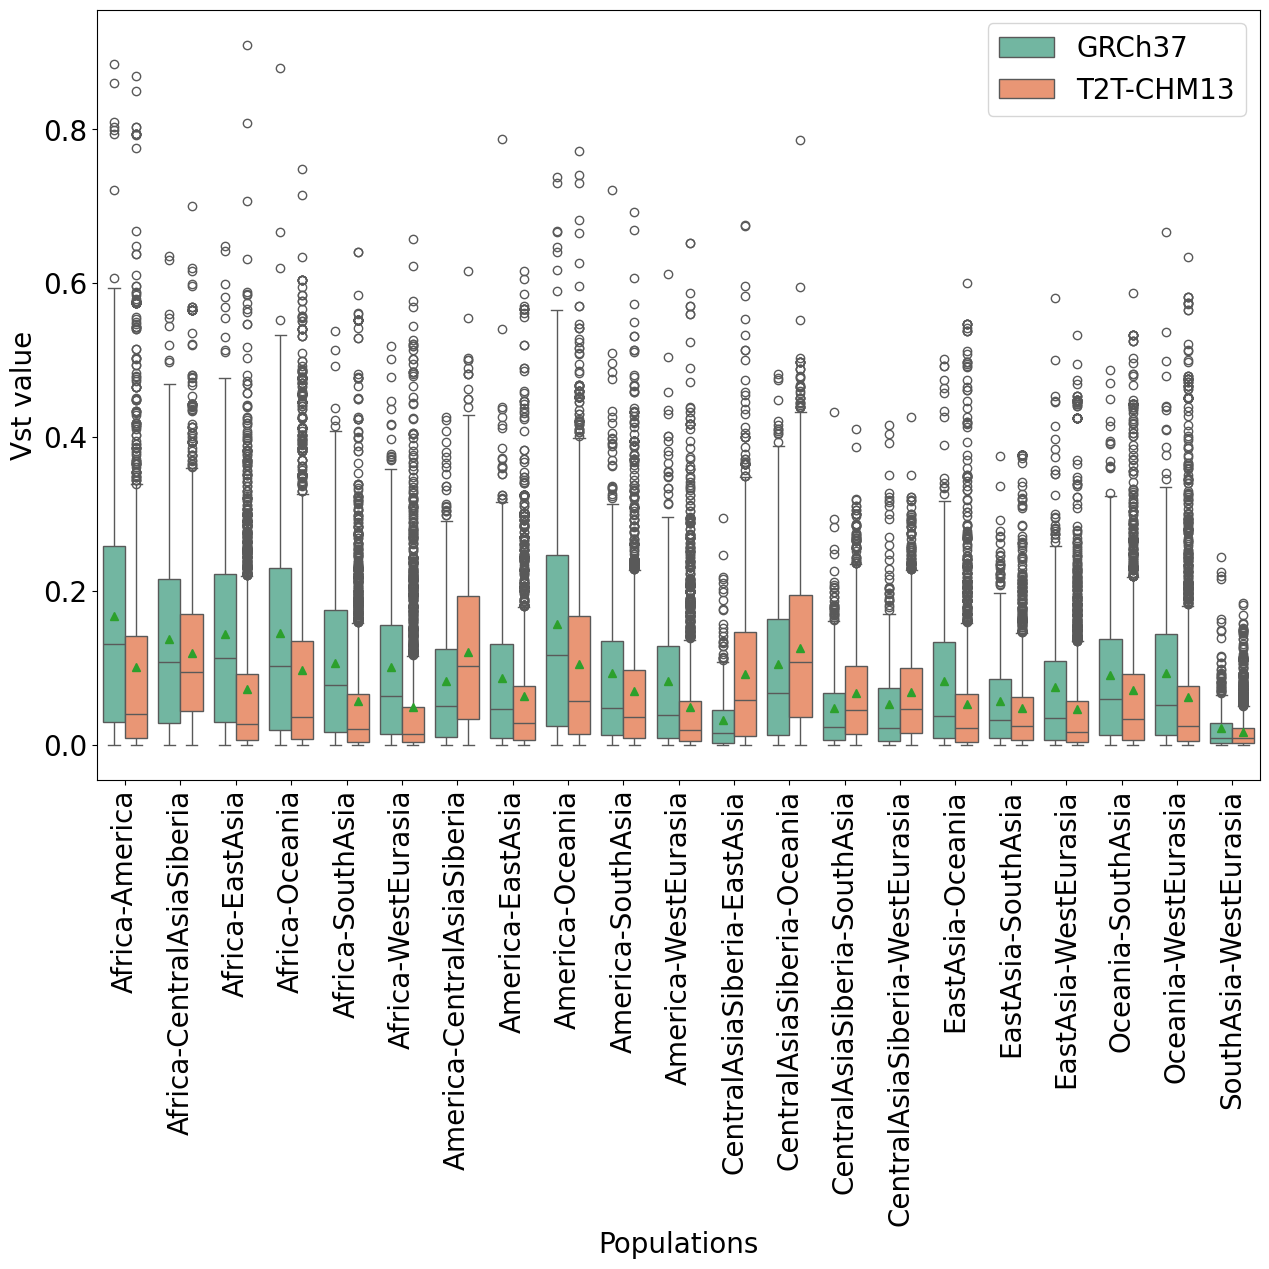

In [413]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
ax = sns.boxplot(x='Populations',y='Vstvalue',data=input_two_anova,hue='Assembly', palette= "Set2", showmeans=True)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.xlabel('Populations', fontsize=20)
plt.ylabel('Vst value', fontsize=20)
plt.legend(loc=1, prop={'size': 20})
plt.savefig('../plots/Figure3a.png', transparent=True, dpi=300, bbox_inches = "tight")
#sns.boxplot(input_boxplot, rot=90)

In [414]:
header_1 = ['Chromosome','Start', 'End', 'Original','Strain']
header_2 = ['Chromosome', 'Start' , 'End']
header_3 = ['Chromosome', 'Start' , 'End', 'Type']
header_4 = ['Chromosome','Start', 'End', 'Type','Strain']

grch37_to_t2t = pd.read_csv('../data/liftover_vsts_grch37_to_t2tchm13.bed', sep='\t', names=header_1)
#grch37_to_t2t = PyRanges(grch37_to_t2t)
''
grch37_to_t2t_types = pd.read_csv('../data/liftover_vsts_grch37_to_t2tchm13_types.bed', sep='\t', names=header_4)

grch37_to_t2t_all = pd.read_csv('../data/liftover_grch37_to_t2tchm13.bed', sep='\t', names=header_1)
grch37_to_t2t_all = PyRanges(grch37_to_t2t_all)

t2t_to_grch37 = pd.read_csv('../data/liftover_vsts_t2tchm13_to_grch37.bed', sep='\t', names=header_1)
t2t_to_grch37 = PyRanges(t2t_to_grch37)

In [415]:
#### GRCh37 vst to T2T vst 
grch37_to_t2t = grch37_to_t2t.merge(grch37_to_t2t_types, on=['Chromosome','Start','End'])
grch37_to_t2t = PyRanges(grch37_to_t2t)
grch37_to_t2t 

,Chromosome,Start,End,Original,Strain_x,Type,Strain_y
0,chr1,7831877,7831877,chr1:8360202-8360201,1,deletion,1
1,chr1,9328929,9328929,chr1:9846202-9846201,1,deletion,1
2,chr1,15268652,15268652,chr1:16150402-16150401,1,deletion,1
3,chr1,23888826,23888826,chr1:24377602-24377601,1,deletion,1
4,chr1,61526516,61526516,chr1:62113302-62113301,1,deletion,1
...,...,...,...,...,...,...,...
453,chr22,37184554,37184554,chr22:37119802-37119801,1,deletion,1
454,chr22,39367662,39367662,chr22:39293302-39293301,1,deletion,1
455,chr22,45005436,45005436,chr22:44917502-44917501,1,deletion,1
456,chr22,45643209,45643209,chr22:45554602-45554601,1,deletion,1


In [416]:
vst_t2t_ranges = PyRanges(vst_t2t)
#t2t.overlap(grch37_to_t2t)
grch37_to_t2tchm13 = grch37_to_t2t.nearest(vst_t2t_ranges)
grch37_to_t2tchm13 = grch37_to_t2tchm13.as_df()

grch37_to_t2tchm13 = grch37_to_t2tchm13[grch37_to_t2tchm13['Distance'] < 2000]

## Getting original coordinates
grch37_to_t2tchm13[['Chromosome_old','coordinates_old']] = grch37_to_t2tchm13.Original.str.split(":", expand = True)
grch37_to_t2tchm13[['Start_old','End_old']] = grch37_to_t2tchm13.coordinates_old.str.split("-", expand = True)
grch37_to_t2tchm13['End_old'] = grch37_to_t2tchm13['End_old'].astype('int64')
grch37_to_t2tchm13['Start_old'] = grch37_to_t2tchm13['Start_old'].astype('int64')
grch37_to_t2tchm13['Start_old'] = grch37_to_t2tchm13['Start_old'] -1 
grch37_to_t2tchm13

,Chromosome,Start,End,Original,Strain_x,Type,Strain_y,Start_b,End_b,Africa-America,...,EastAsia-SouthAsia,EastAsia-WestEurasia,Oceania-SouthAsia,Oceania-WestEurasia,SouthAsia-WestEurasia,Distance,Chromosome_old,coordinates_old,Start_old,End_old
0,chr1,7831877,7831877,chr1:8360202-8360201,1,deletion,1,7831825,7834151,0.27188,...,0.00000,0.00000,0.00000,0.00000,0.00000,0,chr1,8360202-8360201,8360201,8360201
1,chr1,9328929,9328929,chr1:9846202-9846201,1,deletion,1,9327347,9329877,0.22364,...,0.00991,0.03061,0.04083,0.00148,0.07366,0,chr1,9846202-9846201,9846201,9846201
2,chr1,61526516,61526516,chr1:62113302-62113301,1,deletion,1,61525294,61528369,0.37865,...,0.00537,0.00511,0.06277,0.00850,0.01731,0,chr1,62113302-62113301,62113301,62113301
3,chr1,62067167,62067167,chr1:62654202-62654201,1,deletion,1,62054126,62068025,0.24720,...,0.12722,0.12753,0.30360,0.27836,0.00152,0,chr1,62654202-62654201,62654201,62654201
4,chr1,168603450,168603450,chr1:169217202-169217201,1,deletion,1,168602705,168615424,0.09498,...,0.04308,0.10984,0.23385,0.22939,0.02374,0,chr1,169217202-169217201,169217201,169217201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,chr17,35492925,35492925,chr17:32872902-32872901,1,deletion,1,35492933,35494527,0.50097,...,0.00089,0.00218,0.03344,0.02757,0.00037,9,chr17,32872902-32872901,32872901,32872901
398,chr17,60153143,60153143,chr17:57362402-57362401,1,deletion,1,60154450,60159973,0.61064,...,0.12289,0.09149,0.01316,0.00067,0.00767,1308,chr17,57362402-57362401,57362401,57362401
400,chr18,40874737,40874737,chr18:38259802-38259801,1,deletion,1,40871835,40875226,0.06247,...,0.01890,0.00028,0.02205,0.07000,0.02199,0,chr18,38259802-38259801,38259801,38259801
401,chr18,67489787,67489787,chr18:64958902-64958901,1,deletion,1,67489368,67490802,0.00415,...,0.07040,0.18916,0.12478,0.24752,0.03460,0,chr18,64958902-64958901,64958901,64958901


In [417]:
#vst_grcg37_ranges = PyRanges(vst_grch37)
vst_grch37_ranges = grch37_to_t2tchm13.merge(vst_grch37, left_on=['Start_old','Chromosome'], right_on=['Start','Chromosome'])
#vst_grcg37_ranges= vst_grcg37_ranges.drop_duplicates()

In [418]:
## correlation
from itertools import combinations
regions = ['Africa', 'CentralAsiaSiberia', 'America','Oceania', 'WestEurasia', 'SouthAsia', 'EastAsia']
regions.sort()
combination_names = []
for i in list(combinations(regions,2)):
    combination_names.append(i[0]+str('-')+i[1])

In [419]:
## Table S4 

ls = []
for i in range(21):
    r = (stats.pearsonr(vst_grch37_ranges[combination_names[i]+str('_y')],vst_grch37_ranges[combination_names[i]+str('_x')] ))
    ls.append((combination_names[i], r.statistic , r.pvalue))
    d = pd.DataFrame(ls)
d.columns = ['Populations', 'r', 'pvalue']
d.to_csv('../data/S4_table.csv')

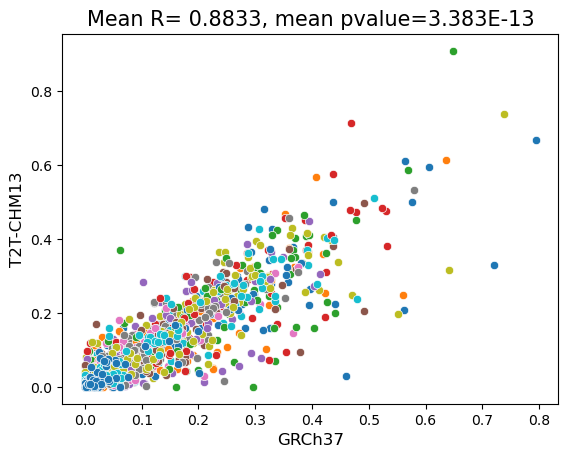

In [420]:
for i in range(21):
    #plt.figure() added for different figures
    #plt.scatter(vst_grch37[combination_names[i]+str('_y')],vst_grch37[combination_names[i]+str('_x')] )
    
    ax =  sns.scatterplot(data=vst_grch37_ranges, x=str(combination_names[i]+str('_y')), y=str(combination_names[i]+str('_x')))
    ax.set(xlabel='GRCh37', ylabel='T2T-CHM13')
    ax.set_xlabel('GRCh37', size = 12)
    ax.set_ylabel('T2T-CHM13', size = 12)
    #plt.xlabel("GRCh37")
    #plt.ylabel("T2T-CHM13")
    plt.title("Mean R= 0.8833, mean pvalue=3.383E-13", size=15)
    plt.savefig('../plots/Figure3b.png', transparent=True)
    
    

In [422]:
## ALL CNVS 

#### GRCh37 all CNVs to T2T all CNVs 
vst_dt_t2t_ranges = PyRanges(vst_dt_t2t)
grch37_to_t2tchm13 = grch37_to_t2t_all.nearest(vst_dt_t2t_ranges)
grch37_to_t2tchm13 = grch37_to_t2tchm13.as_df()
grch37_to_t2tchm13  =grch37_to_t2tchm13[grch37_to_t2tchm13['Distance'] < 2]

## Getting vst values 
grch37_to_t2tchm13[['Chromosome_old','coordinates_old']] = grch37_to_t2tchm13.Original.str.split(":", expand = True)
grch37_to_t2tchm13[['Start_old','End_old']] = grch37_to_t2tchm13.coordinates_old.str.split("-", expand = True)

grch37_to_t2tchm13['End_old'] = grch37_to_t2tchm13['End_old'].astype('int64')
grch37_to_t2tchm13['Start_old'] = grch37_to_t2tchm13['Start_old'].astype('int64')
grch37_to_t2tchm13['Start_old'] = grch37_to_t2tchm13['Start_old'] -1 
grch37_to_t2tchm13

,Chromosome,Start,End,Original,Strain,Start_b,End_b,Africa-America,Africa-CentralAsiaSiberia,Africa-EastAsia,...,EastAsia-SouthAsia,EastAsia-WestEurasia,Oceania-SouthAsia,Oceania-WestEurasia,SouthAsia-WestEurasia,Distance,Chromosome_old,coordinates_old,Start_old,End_old
0,chr1,385106,385106,chr1:891702-891701,1,385084,387761,0.06949,0.29305,0.07077,...,0.00427,0.00027,0.04083,0.01295,0.00638,0,chr1,891702-891701,891701,891701
1,chr1,502515,502515,chr1:1007802-1007801,1,502101,503101,0.00813,0.00134,0.01278,...,0.00000,0.00000,0.00000,0.00000,0.00000,0,chr1,1007802-1007801,1007801,1007801
2,chr1,542636,542636,chr1:1049402-1049401,1,540598,544980,0.06195,0.00624,0.04887,...,0.02473,0.00286,0.02013,0.00151,0.00961,0,chr1,1049402-1049401,1049401,1049401
3,chr1,578336,578336,chr1:1085102-1085101,1,576150,578407,0.00813,0.00134,0.00325,...,0.01312,0.02871,0.01192,0.03330,0.07150,0,chr1,1085102-1085101,1085101,1085101
4,chr1,730467,730467,chr1:1234302-1234301,1,729845,731135,0.00268,0.00324,0.00423,...,0.02895,0.00531,0.04436,0.01774,0.00262,0,chr1,1234302-1234301,1234301,1234301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7200,chr18,74354032,74354032,chr18:71800302-71800301,1,74353844,74356657,0.00000,0.00000,0.01109,...,0.01066,0.01831,0.00000,0.00340,0.00484,0,chr18,71800302-71800301,71800301,71800301
7201,chr18,74924414,74924414,chr18:72407002-72407001,1,74919593,74924503,0.00000,0.00000,0.00000,...,0.00000,0.00531,0.00000,0.00340,0.00484,0,chr18,72407002-72407001,72407001,72407001
7202,chr18,75124641,75124641,chr18:72607202-72607201,1,75123737,75124829,0.00000,0.00000,0.00000,...,0.00000,0.00531,0.00000,0.00340,0.00484,0,chr18,72607202-72607201,72607201,72607201
7203,chr18,75431640,75431640,chr18:72914202-72914201,1,75431629,75432849,0.00000,0.00000,0.00000,...,0.00000,0.01941,0.00000,0.01248,0.01771,0,chr18,72914202-72914201,72914201,72914201


In [427]:
vst_grch37 = grch37_to_t2tchm13.merge(vst_dt_grch37, left_on=['Start_old','Chromosome'], right_on=['Start','Chromosome'])
vst_grch37 = vst_grch37.drop_duplicates()
vst_grch37

,Chromosome,Start_x,End_x,Original,Strain,Start_b,End_b,Africa-America_x,Africa-CentralAsiaSiberia_x,Africa-EastAsia_x,...,CentralAsiaSiberia-EastAsia_y,CentralAsiaSiberia-Oceania_y,CentralAsiaSiberia-SouthAsia_y,CentralAsiaSiberia-WestEurasia_y,EastAsia-Oceania_y,EastAsia-SouthAsia_y,EastAsia-WestEurasia_y,Oceania-SouthAsia_y,Oceania-WestEurasia_y,SouthAsia-WestEurasia_y
0,chr1,385106,385106,chr1:891702-891701,1,385084,387761,0.06949,0.29305,0.07077,...,0.00197,0.01172,0.04514,0.00009,0.00335,0.02864,0.00120,0.05328,0.00782,0.01734
1,chr1,502515,502515,chr1:1007802-1007801,1,502101,503101,0.00813,0.00134,0.01278,...,0.00815,0.01245,0.02210,0.00737,0.00016,0.00272,0.00002,0.00147,0.00005,0.00202
2,chr1,542636,542636,chr1:1049402-1049401,1,540598,544980,0.06195,0.00624,0.04887,...,0.01164,0.04786,0.00107,0.00832,0.01823,0.01922,0.00021,0.06119,0.01118,0.01375
3,chr1,578336,578336,chr1:1085102-1085101,1,576150,578407,0.00813,0.00134,0.00325,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,chr1,730467,730467,chr1:1234302-1234301,1,729845,731135,0.00268,0.00324,0.00423,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5348,chr18,74354032,74354032,chr18:71800302-71800301,1,74353844,74356657,0.00000,0.00000,0.01109,...,0.00000,0.00000,0.01065,0.00365,0.00000,0.01404,0.00522,0.00993,0.00334,0.00191
5349,chr18,74924414,74924414,chr18:72407002-72407001,1,74919593,74924503,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.01065,0.00365,0.00000,0.01404,0.00522,0.00993,0.00334,0.00191
5350,chr18,75124641,75124641,chr18:72607202-72607201,1,75123737,75124829,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
5351,chr18,75431640,75431640,chr18:72914202-72914201,1,75431629,75432849,0.00000,0.00000,0.00000,...,0.00815,0.04592,0.00000,0.00365,0.02084,0.01009,0.00002,0.05328,0.01747,0.00471


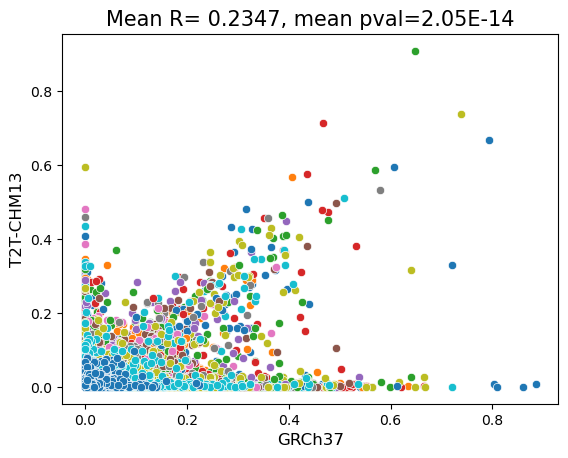

In [429]:
for i in range(21):
    #plt.figure() added for different figures
    #plt.scatter(vst_grch37[combination_names[i]+str('_y')],vst_grch37[combination_names[i]+str('_x')] )

    ax =  sns.scatterplot(data=vst_grch37, x=str(combination_names[i]+str('_y')), y=str(combination_names[i]+str('_x')))
    
    ax.set(xlabel='GRCh37', ylabel='T2T-CHM13')

    ax.set_xlabel('GRCh37', size = 12)
    ax.set_ylabel('T2T-CHM13', size = 12)
    #plt.xlabel("GRCh37")
    #plt.ylabel("T2T-CHM13")
    plt.title("Mean R= 0.2347, mean pval=2.05E-14", size=15)
    plt.savefig('../plots/Figure3b.png', transparent=True)
    
    
 ##### significant    

In [444]:
pd.read_csv('/Users/luciabazan/output.tsv', sep='\t', header=None)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,file,rd_mean_shift,deletion,chr1,405001.0,408000.0,3000.0,0.236419,6.836334e+03,1.205182e-20,NaN,0.000000e+00,0.311475,0.000000,405100.0
1,file,rd_mean_shift,deletion,chr1,859001.0,863000.0,4000.0,0.330786,1.240770e+03,1.292601e-16,32601.719825,7.962257e-23,0.156250,0.000000,859100.0
2,file,rd_mean_shift,deletion,chr1,1129001.0,1177000.0,48000.0,0.558111,0.000000e+00,1.988823e-10,0.000000,1.249989e-09,0.321913,0.000000,1129100.0
3,file,rd_mean_shift,deletion,chr1,1761001.0,1765000.0,4000.0,0.241580,5.013244e+02,2.677148e-29,18132.364072,0.000000e+00,0.363874,0.000000,1761100.0
4,file,rd_mean_shift,deletion,chr1,2169001.0,2193000.0,24000.0,0.533865,0.000000e+00,6.284970e-103,0.000000,1.268472e-93,0.020630,0.000000,2169100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,file,rd_mean_shift,deletion,chrX,142484001.0,142487000.0,3000.0,0.614878,2.723708e+03,4.581770e-05,NaN,7.228251e+04,0.331296,0.000000,11772700.0
894,file,rd_mean_shift,deletion,chrX,150181001.0,150186000.0,5000.0,0.681533,5.144071e+01,9.105133e-04,6265.887359,9.094631e+01,0.103815,0.000000,4073700.0
895,file,rd_mean_shift,deletion,chrX,153914001.0,153917000.0,3000.0,0.001510,1.822883e-01,0.000000e+00,NaN,0.000000e+00,0.000000,0.000000,342700.0
896,file,rd_mean_shift,deletion,chrY,285001.0,292000.0,7000.0,0.611564,2.308265e-02,2.483219e-23,1.263928,9.781308e-15,0.438290,0.000000,285100.0


In [449]:
# Correlation of CNVs on one individual
old_assembly = pd.read_csv('../data/call_cnvr_grch37/grch37_cnvs.txt', sep='\t')
sample_old = old_assembly[old_assembly['Sample_ID'] == 'LP6005441-DNA_B10']
sample_old = sample_old[['Chr', 'Start', 'End', 'CNV_Value']]
sample_old['Chr'] = str('chr')+sample_old['Chr']
#sample_old.to_csv('LP6005441-DNA_B10_grch37.bed', index=False, header=False, sep='\t')
#list(sample_old.columns)
sample_old.columns = ['Chromosome', 'Start','End', 'CNV_Value']

In [450]:
sample_grch37 = pd.read_csv('/Users/luciabazan/Downloads/sample_old_to_new.bed', header=None, sep='\t')
sample_grch37 = sample_grch37.drop(columns = 4)
sample_grch37.columns = list(sample_old.columns)
sample_grch37['assembly'] = 'GRCh37'

sample_t2t = pd.read_csv('/Users/luciabazan/output.tsv', sep='\t', header=None)
sample_t2t = sample_t2t[[3,4,5,7]]
sample_t2t.columns = list(sample_old.columns)
sample_t2t['CNV_Value'] = sample_t2t['CNV_Value'] * 2 
sample_t2t = sample_t2t[sample_t2t['Chromosome'] != 'chrM']
sample_t2t['assembly'] = 'T2T-CHM13'

sample_t2t = PyRanges(sample_t2t)
sample_grch37 = PyRanges(sample_grch37)

grch37_to_t2tchm13 = sample_grch37.nearest(sample_t2t)
grch37_to_t2tchm13 = grch37_to_t2tchm13.as_df()

grch37_to_t2tchm13 = grch37_to_t2tchm13[grch37_to_t2tchm13['Distance'] < 1]
grch37_to_t2tchm13

,Chromosome,Start,End,CNV_Value,assembly,Start_b,End_b,CNV_Value_b,assembly_b,Distance
0,chr1,24031706,24034899,0.937628,GRCh37,24032001,24035000,0.948935,T2T-CHM13,0
1,chr1,53009847,53011347,0.182013,GRCh37,53010001,53012000,0.660228,T2T-CHM13,0
2,chr1,62067767,62070134,0.845412,GRCh37,62068001,62070000,0.834691,T2T-CHM13,0
3,chr1,109063948,109065947,0.059734,GRCh37,109064001,109066000,0.121631,T2T-CHM13,0
4,chr1,229055729,229064235,1.092888,GRCh37,229056001,229064000,1.083906,T2T-CHM13,0
...,...,...,...,...,...,...,...,...,...,...
728,chrX,32567253,32569052,0.025010,GRCh37,32567001,32569000,0.264155,T2T-CHM13,0
729,chrX,52076174,52083871,3.100360,GRCh37,52056001,52204000,2.968043,T2T-CHM13,0
730,chrX,52089083,52198460,2.928640,GRCh37,52056001,52204000,2.968043,T2T-CHM13,0
731,chrX,92591057,92594856,0.027762,GRCh37,92591001,92595000,0.143880,T2T-CHM13,0


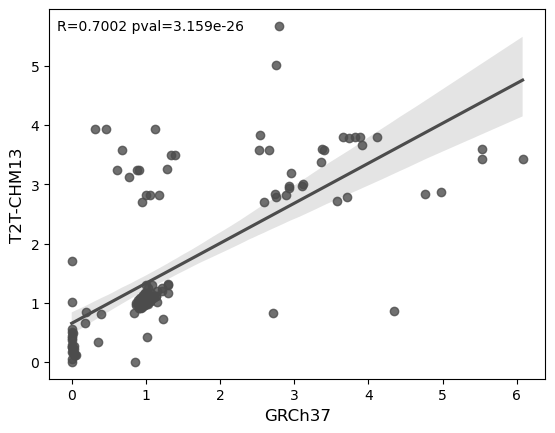

'3.1590507813993734e-26'

In [452]:
obtained = stats.spearmanr(grch37_to_t2tchm13['CNV_Value'], grch37_to_t2tchm13['CNV_Value_b'])



ax =  sns.regplot(data=grch37_to_t2tchm13, x="CNV_Value", y="CNV_Value_b", color=".3")
ax.set(xlabel='GRCh37', ylabel='T2T-CHM13')

ax.set_xlabel('GRCh37', size = 12)
ax.set_ylabel('T2T-CHM13', size = 12)


plt.text(-0.2,5.6,('R=0.7002 pval=3.159e-26'), fontsize=10)
plt.savefig('../plots/Figure5a.png', transparent=True)
plt.show()


#ax =  sns.regplot(data=grch37_to_t2tchm13, x="RD", y="RD_b", color=".3")
#ax.set(xlabel='GRCh37', ylabel='T2T-CHM13')
str(obtained.pvalue)

In [499]:
sudmant = pd.read_csv('/Users/luciabazan/Downloads/sudmant_data.csv')
sudmant = sudmant[['contig','start','end','AMR_Maya_HGDP00855_F']]
sudmant.columns =['Chromosome', 'Start', 'End', 'CNV_value']
sudmant = sudmant[sudmant['CNV_value'] != 2]
#sudmant.to_csv('LP6005441-DNA_B10_grch37_sdumant.bed', index=False, header=False, sep='\t')
sudmant#.columns = ['Chromosome','Start','End','RD','assembly']

,Chromosome,Start,End,CNV_value
0,chr1,12048,177033,22
1,chr1,12048,89237,10
5,chr1,228416,267160,24
8,chr1,461963,471226,-1
9,chr1,471226,471326,10
...,...,...,...,...
14977,chrX,75525579,75617789,3
14989,chrX,84105273,84119490,3
15000,chrX,134749333,134807363,3
15004,chrX,29268810,29271507,3


In [501]:
sample_t2t = chm13[chm13['Sample_ID'] == 'LP6005441-DNA_B10']
sample_t2t = sample_t2t[sample_t2t['CNV_Value'] !=2 ]
sample_t2t['assembly'] = 'T2T-CHM13'
sample_t2t.dropna(inplace=True)

sample_t2t = sample_t2t[['Chromosome','Start','End','CNV_Value','assembly']]
sample_t2t['Chromosome'] = 'chr' + sample_t2t['Chromosome'].astype(str)
sample_t2t.columns = ['Chromosome','Start','End','RD','assembly']

sample_grch37 = pd.read_csv('/Users/luciabazan/Downloads/sudmant_to_t2t.bed', header=None, sep='\t')
sample_grch37 = sample_grch37.drop(columns = 4)
sample_grch37.columns = list(sample_old.columns)
sample_grch37['assembly'] = 'GRCh37'
sample_grch37.columns = ['Chromosome','Start','End','RD','assembly']
sample_grch37


,Chromosome,Start,End,RD,assembly
0,chr19,4634,75035,22,GRCh37
1,chr19,78511,79988,22,GRCh37
2,chr16,96213565,96307990,22,GRCh37
3,chr1,221702058,221754467,22,GRCh37
4,chr19,4634,75035,10,GRCh37
...,...,...,...,...,...
5995,chrX,74739070,74831189,3,GRCh37
5996,chrX,83278897,83293116,3,GRCh37
5997,chrX,133941192,133999187,3,GRCh37
5998,chrX,28842762,28845459,3,GRCh37


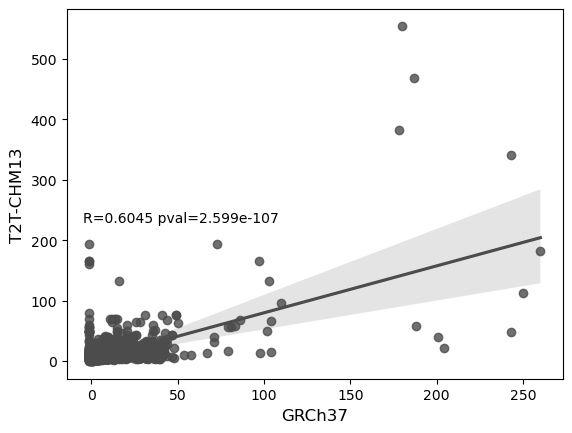

In [503]:
sample_t2t = PyRanges(sample_t2t)
sample_grch37 = PyRanges(sample_grch37)

grch37_to_t2tchm13 = sample_grch37.nearest(sample_t2t)
grch37_to_t2tchm13 = grch37_to_t2tchm13.as_df()

grch37_to_t2tchm13 = grch37_to_t2tchm13[grch37_to_t2tchm13['Distance'] < 1000]
grch37_to_t2tchm13


obtained = stats.spearmanr(grch37_to_t2tchm13['RD'], grch37_to_t2tchm13['RD_b'])
obtained

ax =  sns.regplot(data=grch37_to_t2tchm13, x="RD", y="RD_b", color=".3")
ax.set(xlabel='GRCh37', ylabel='T2T-CHM13')
ax.set_xlabel('GRCh37', size = 12)
ax.set_ylabel('T2T-CHM13', size = 12)
plt.text(-5,230,('R=0.6045 pval=2.599e-107'), fontsize=10)
plt.savefig('../plots/Figure5b.png', transparent=True)
plt.show()

In [498]:
sample_t2t

,Chromosome,Start,End,CNV_Value,assembly
54908,chr18,291416,302798,1,T2T-CHM13
54909,chr18,381821,390685,1,T2T-CHM13
54910,chr18,441087,448711,1,T2T-CHM13
54911,chr18,915474,919660,1,T2T-CHM13
54912,chr18,994262,1000835,1,T2T-CHM13
...,...,...,...,...,...
2686413,chr1,248364795,248366351,23,T2T-CHM13
2686414,chr1,248366351,248367622,27,T2T-CHM13
2686415,chr1,248367622,248368745,25,T2T-CHM13
2686416,chr1,248368745,248370339,39,T2T-CHM13
